## Data Cleaning and pre-processing for Gold Price Prediction

### Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

### Reading the csv data using pandas

In [2]:
df=pd.read_csv('project_data.csv',index_col='Date', parse_dates = True, infer_datetime_format = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000



# 1. DATA CLEANING


### Getting an overview of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

### Getting the technical indications of the data

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

### Finding the null values in the data

In [5]:
df.isna().sum().to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### Get Shape of Data

In [9]:
df.shape

(1718, 80)

### Report of Null Values

In [10]:
def null_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)

In [11]:
null_report(df)

,Total NaN,Percent of NaN,Nunique,Dtype
Open,0,0.0,1363,float64
High,0,0.0,1368,float64
PLD_High,0,0.0,1500,float64
PLD_Open,0,0.0,1550,float64
PLD_Price,0,0.0,1560,float64
...,...,...,...,...
EU_open,0,0.0,1282,float64
EU_Price,0,0.0,1268,float64
EG_volume,0,0.0,1613,int64
EG_Ajclose,0,0.0,1091,float64


### Plotting the null values using a heatmap

<AxesSubplot:ylabel='Date'>

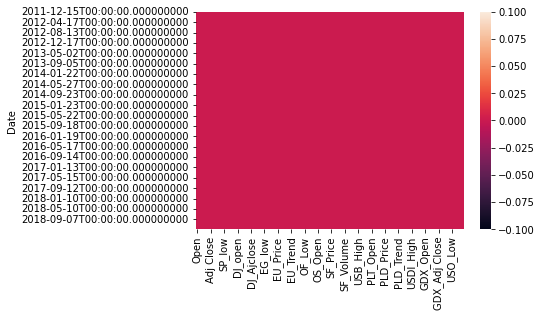

In [8]:
sns.heatmap(df.isnull())

## Since there is no color variation in the heatmap, this shows that there are no null values in the dataset


# 2. Exploratory Data Analysis

In [30]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(10,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

count    1718.000000
mean      127.323434
std        17.526993
min       100.919998
25%       116.220001
50%       121.915001
75%       128.427494
max       173.199997
Name: Open, dtype: float64


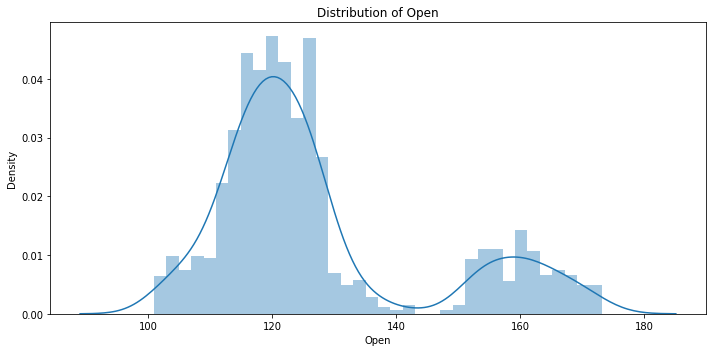

count    1718.000000
mean      127.854237
std        17.631189
min       100.989998
25%       116.540001
50%       122.325001
75%       129.087498
max       174.070007
Name: High, dtype: float64


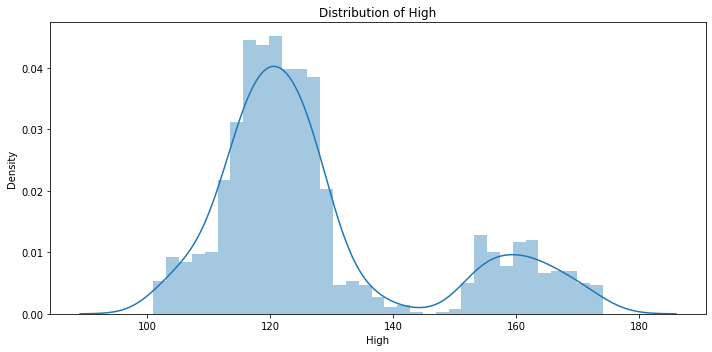

count    1718.000000
mean      126.777695
std        17.396513
min       100.230003
25%       115.739998
50%       121.369999
75%       127.840001
max       172.919998
Name: Low, dtype: float64


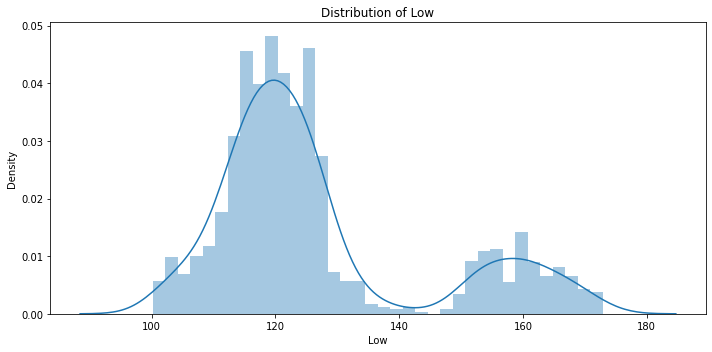

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Close, dtype: float64


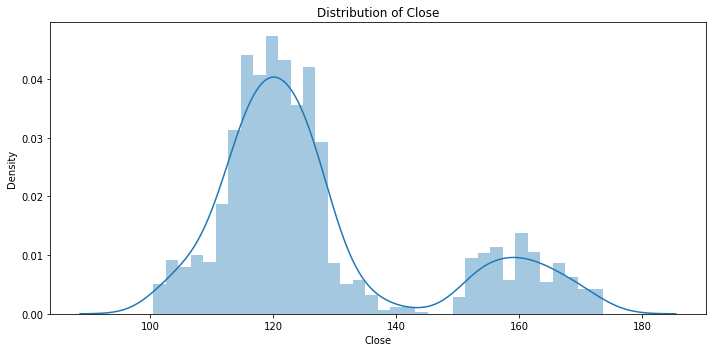

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Adj Close, dtype: float64


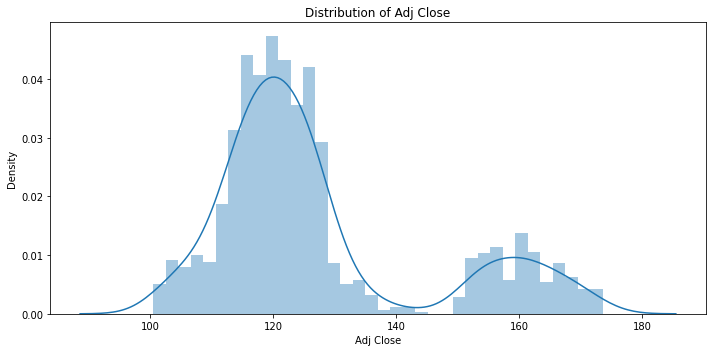

count    1.718000e+03
mean     8.446327e+06
std      4.920731e+06
min      1.501600e+06
25%      5.412925e+06
50%      7.483900e+06
75%      1.020795e+07
max      9.380420e+07
Name: Volume, dtype: float64


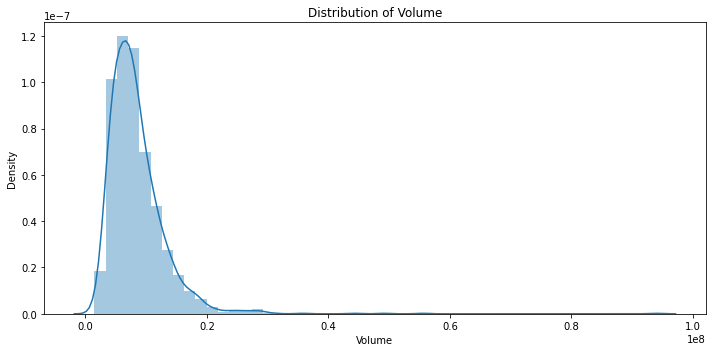

count    1718.000000
mean      204.490023
std        43.831928
min       122.059998
25%       170.392498
50%       205.464996
75%       237.292500
max       293.089996
Name: SP_open, dtype: float64


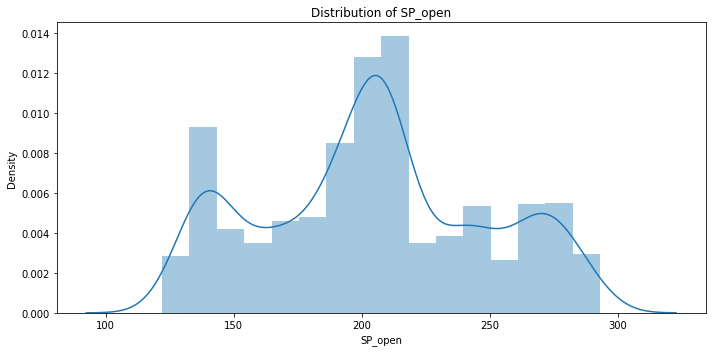

count    1718.000000
mean      205.372637
std        43.974644
min       122.320000
25%       170.962506
50%       206.459999
75%       237.722500
max       293.940002
Name: SP_high, dtype: float64


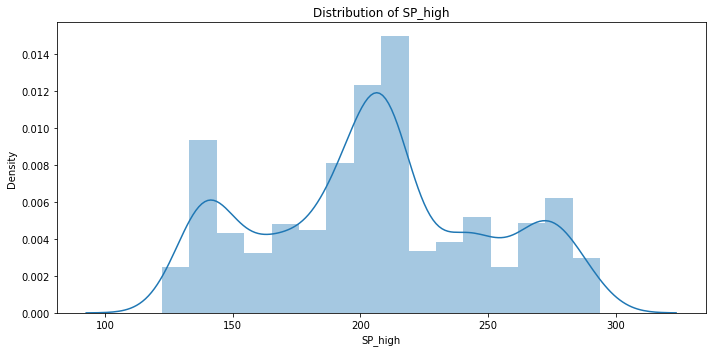

count    1718.000000
mean      203.487014
std        43.618940
min       120.029999
25%       169.577499
50%       204.430000
75%       236.147503
max       291.809998
Name: SP_low, dtype: float64


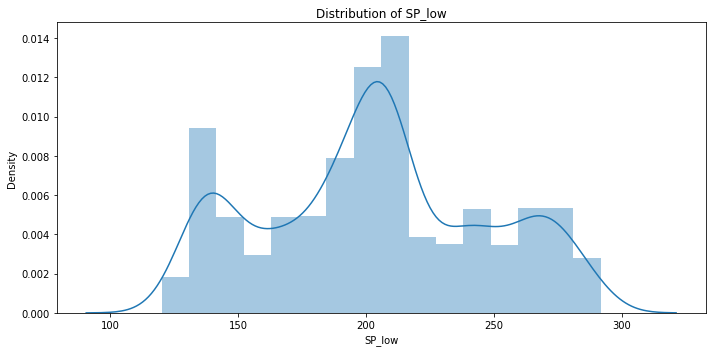

count    1718.000000
mean      204.491222
std        43.776999
min       120.290001
25%       170.397500
50%       205.529999
75%       236.889996
max       293.579987
Name: SP_close, dtype: float64


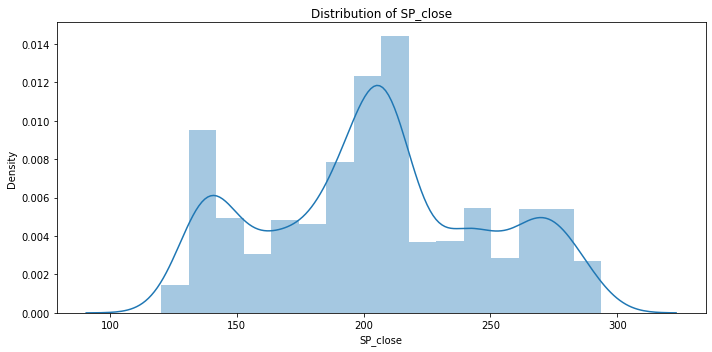

count    1718.000000
mean      192.204570
std        48.514161
min       104.468536
25%       153.027992
50%       191.658341
75%       228.721389
max       290.560242
Name: SP_Ajclose, dtype: float64


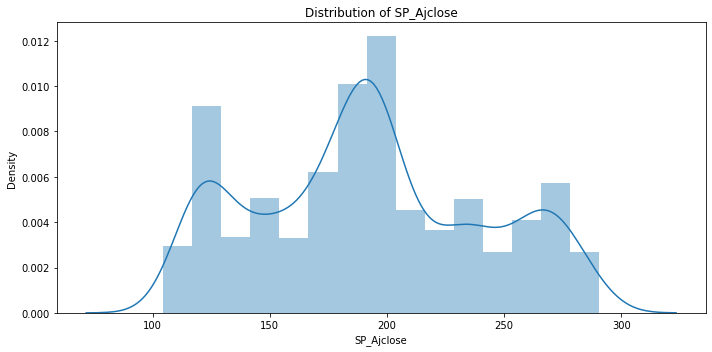

count    1.718000e+03
mean     1.098026e+08
std      4.925110e+07
min      2.785650e+07
25%      7.387085e+07
50%      9.972020e+07
75%      1.351161e+08
max      5.072443e+08
Name: SP_volume, dtype: float64


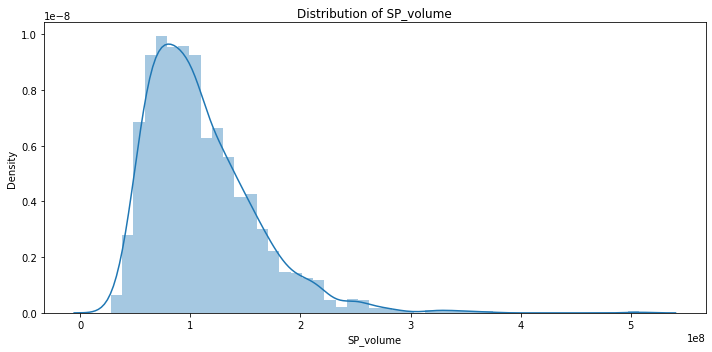

count     1718.000000
mean     18161.094398
std       3889.752079
min      11769.209960
25%      15487.930173
50%      17601.095705
75%      20866.907225
max      26833.470700
Name: DJ_open, dtype: float64


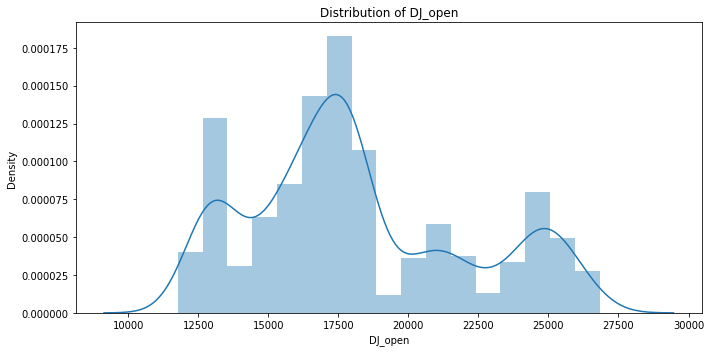

count     1718.000000
mean     18244.137842
std       3906.008604
min      11925.879880
25%      15551.170168
50%      17714.395510
75%      20910.837405
max      26951.810550
Name: DJ_high, dtype: float64


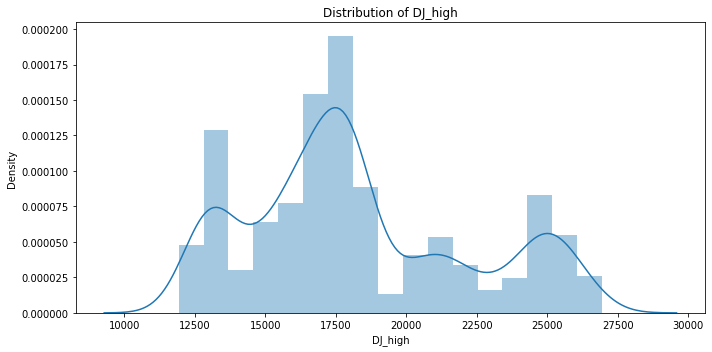

count     1718.000000
mean     18073.889095
std       3867.959072
min      11735.190430
25%      15419.387207
50%      17510.290040
75%      20785.035648
max      26789.080080
Name: DJ_low, dtype: float64


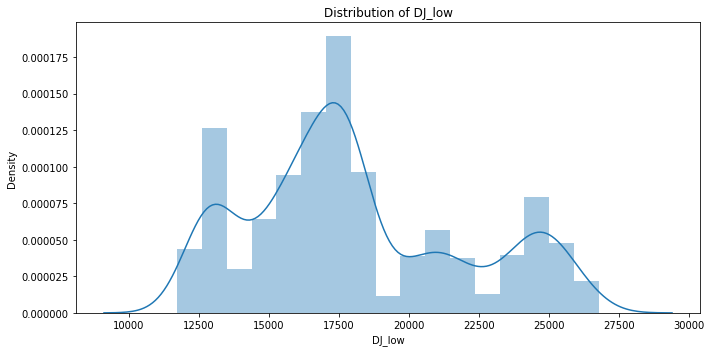

count     1718.000000
mean     18164.119043
std       3884.495887
min      11766.259770
25%      15495.665280
50%      17612.939455
75%      20851.157715
max      26828.390630
Name: DJ_close, dtype: float64


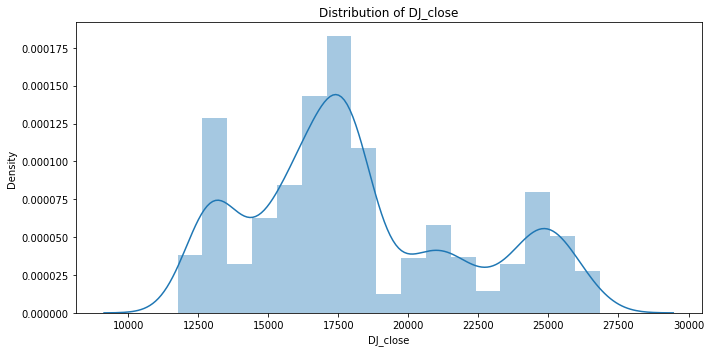

count     1718.000000
mean     18164.119043
std       3884.495887
min      11766.259770
25%      15495.665280
50%      17612.939455
75%      20851.157715
max      26828.390630
Name: DJ_Ajclose, dtype: float64


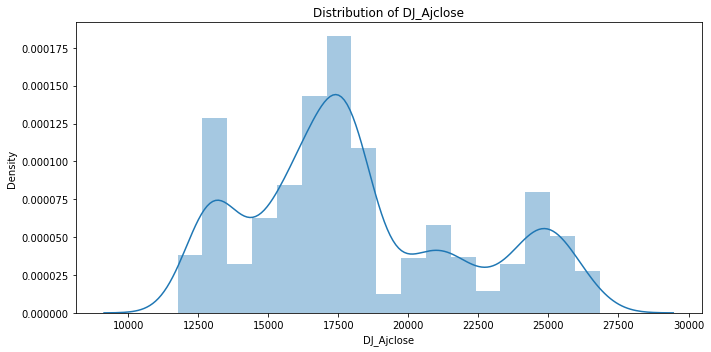

count    1.718000e+03
mean     1.779131e+08
std      1.212753e+08
min      8.410000e+06
25%      9.232000e+07
50%      1.206950e+08
75%      2.636300e+08
max      9.005100e+08
Name: DJ_volume, dtype: float64


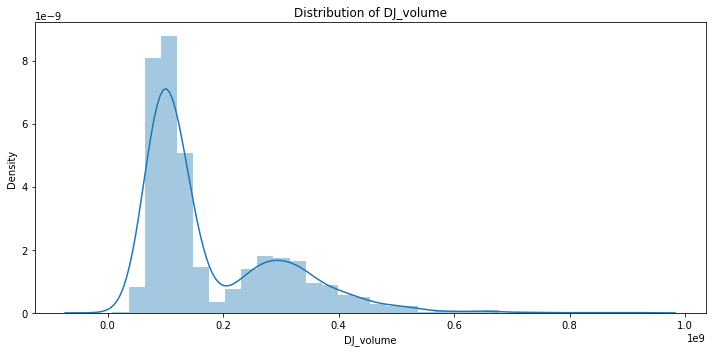

count    1718.000000
mean       28.276554
std        20.325861
min         2.770000
25%        14.200000
50%        22.800000
75%        37.150002
max        80.199997
Name: EG_open, dtype: float64


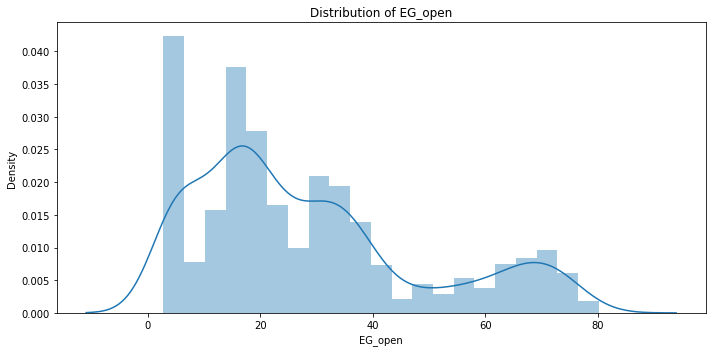

count    1718.000000
mean       28.822555
std        20.620624
min         2.850000
25%        14.550000
50%        23.125000
75%        37.849998
max        81.000000
Name: EG_high, dtype: float64


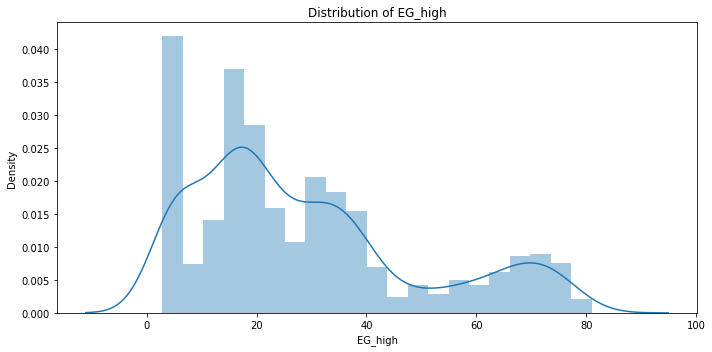

count    1718.000000
mean       27.653655
std        19.972314
min         2.730000
25%        13.762500
50%        21.800000
75%        36.450001
max        77.900002
Name: EG_low, dtype: float64


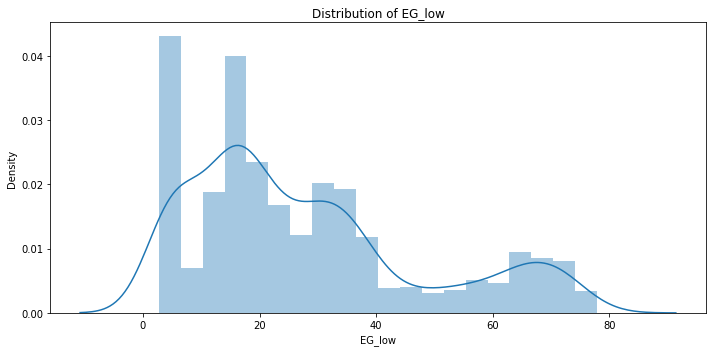

count    1718.000000
mean       28.209302
std        20.294635
min         2.800000
25%        14.150000
50%        22.524999
75%        37.187501
max        79.800003
Name: EG_close, dtype: float64


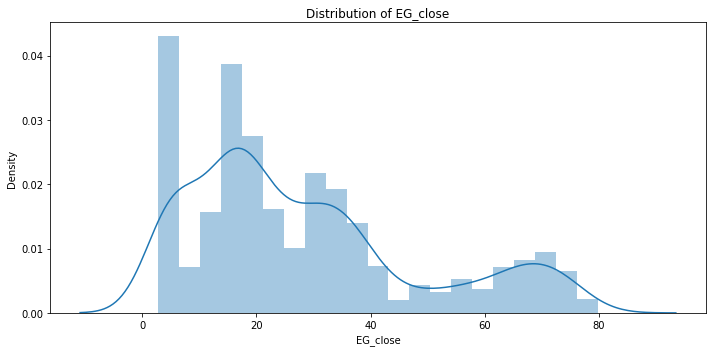

count    1718.000000
mean       27.783958
std        19.721857
min         2.800000
25%        14.082418
50%        22.408089
75%        36.811500
max        77.999313
Name: EG_Ajclose, dtype: float64


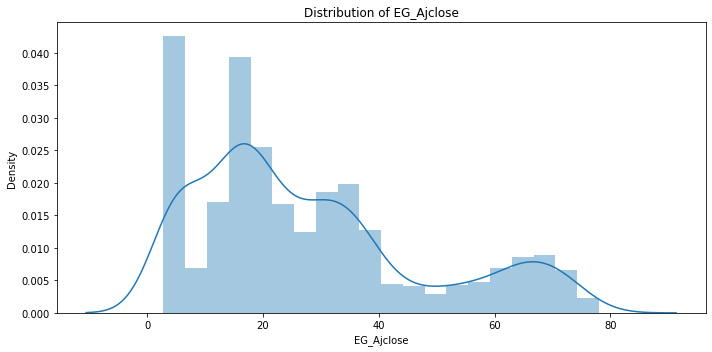

count    1.718000e+03
mean     1.136074e+06
std      7.301289e+05
min      1.645000e+05
25%      7.006250e+05
50%      9.688000e+05
75%      1.344775e+06
max      1.006120e+07
Name: EG_volume, dtype: float64


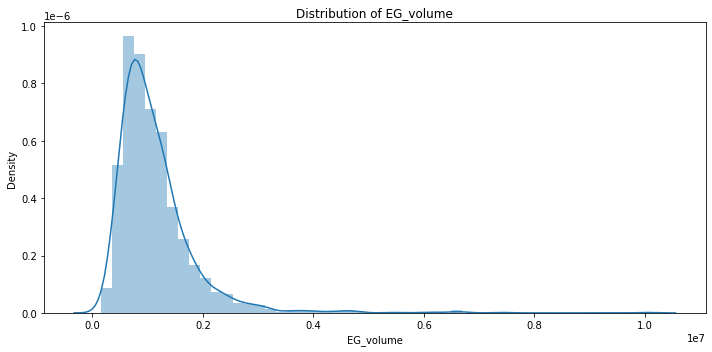

count    1718.000000
mean        1.208494
std         0.100535
min         1.038700
25%         1.120800
50%         1.184050
75%         1.305550
max         1.393400
Name: EU_Price, dtype: float64


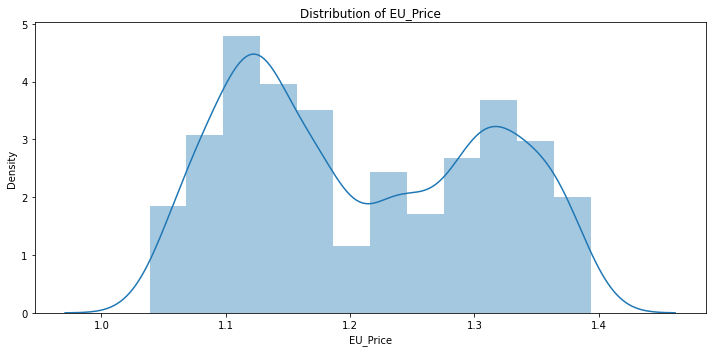

count    1718.000000
mean        1.208531
std         0.100579
min         1.039000
25%         1.120900
50%         1.184100
75%         1.305475
max         1.393300
Name: EU_open, dtype: float64


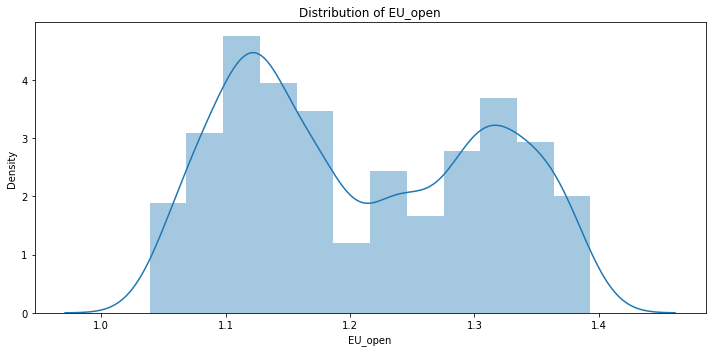

count    1718.000000
mean        1.213360
std         0.100184
min         1.041900
25%         1.125800
50%         1.187850
75%         1.310275
max         1.399300
Name: EU_high, dtype: float64


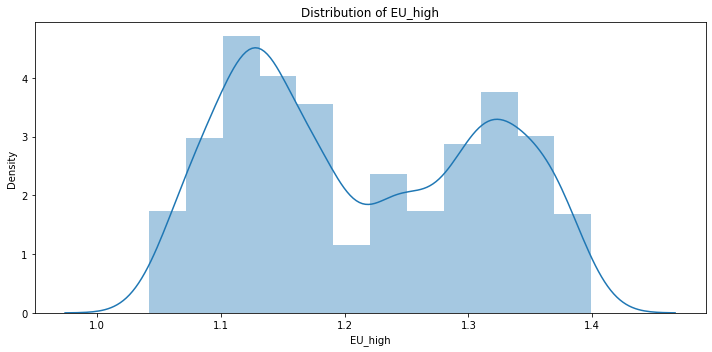

count    1718.000000
mean        1.203692
std         0.100695
min         1.034100
25%         1.115900
50%         1.179450
75%         1.299850
max         1.391000
Name: EU_low, dtype: float64


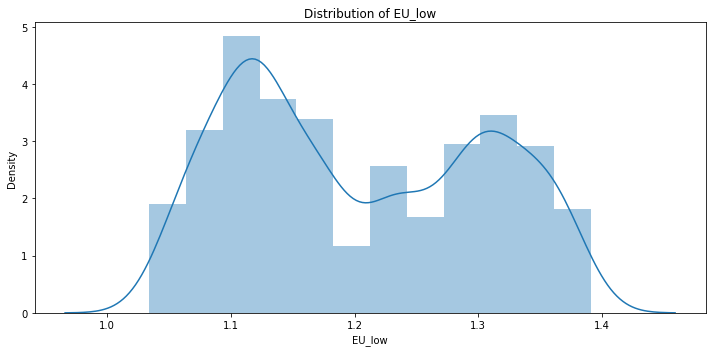

count    1718.000000
mean        0.494761
std         0.500118
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: EU_Trend, dtype: float64


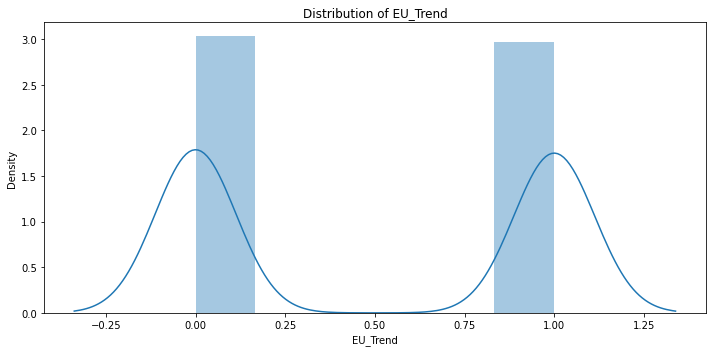

count    1718.000000
mean       77.504523
std        27.400703
min        27.880000
25%        52.152500
50%        70.115000
75%       107.730000
max       126.220000
Name: OF_Price, dtype: float64


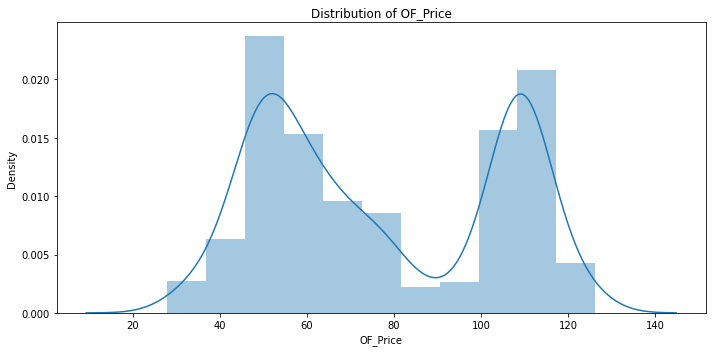

count    1718.000000
mean       77.521740
std        27.366113
min        27.990000
25%        52.202500
50%        70.090000
75%       107.682500
max       126.160000
Name: OF_Open, dtype: float64


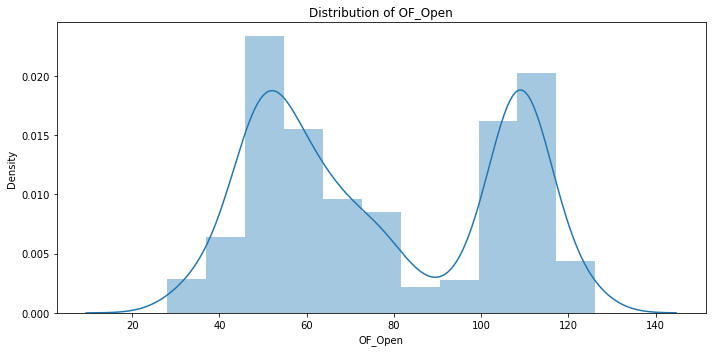

count    1718.000000
mean       78.384936
std        27.393294
min        28.750000
25%        52.862500
50%        70.790000
75%       108.447500
max       128.400000
Name: OF_High, dtype: float64


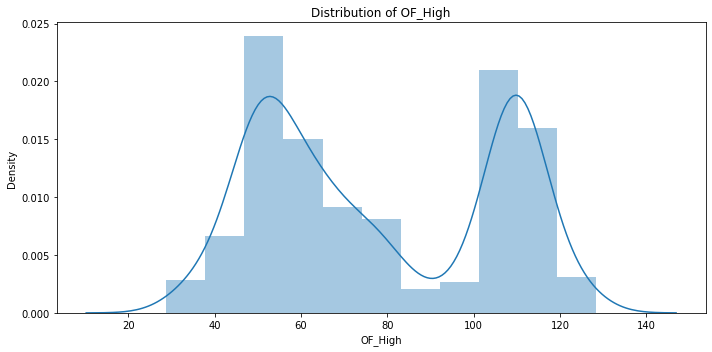

count    1718.000000
mean       76.593894
std        27.322868
min        27.100000
25%        51.362500
50%        69.035000
75%       106.865000
max       125.000000
Name: OF_Low, dtype: float64


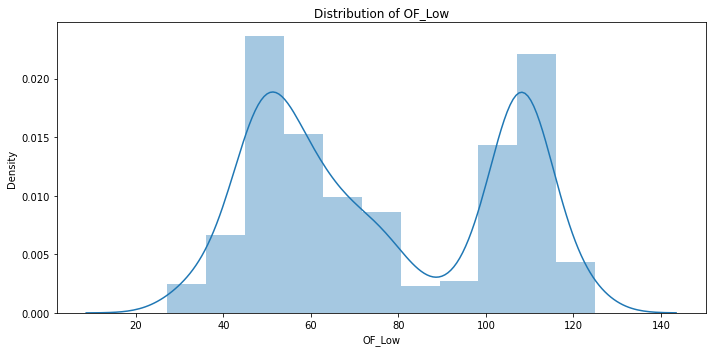

count      1718.000000
mean     225958.585565
std       88844.540581
min       11520.000000
25%      175940.000000
50%      223485.000000
75%      281382.500000
max      567760.000000
Name: OF_Volume, dtype: float64


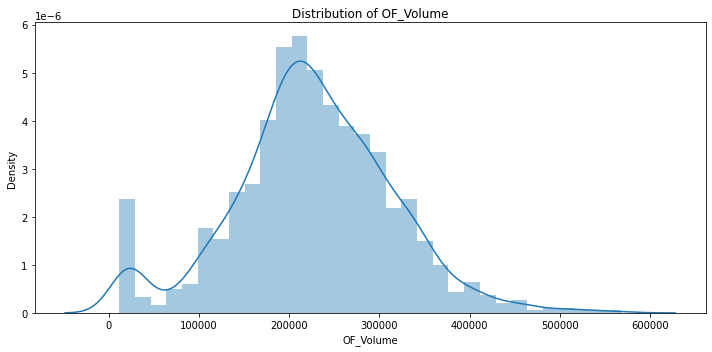

count    1718.000000
mean        0.498836
std         0.500144
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OF_Trend, dtype: float64


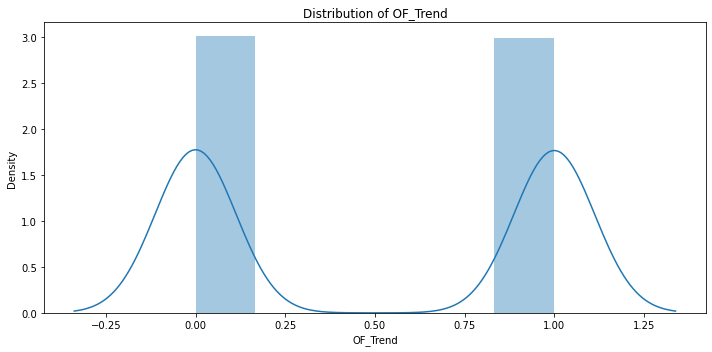

count    1718.000000
mean       70.153097
std        23.471514
min        26.550000
25%        48.922500
50%        64.680000
75%        94.280000
max       110.300000
Name: OS_Price, dtype: float64


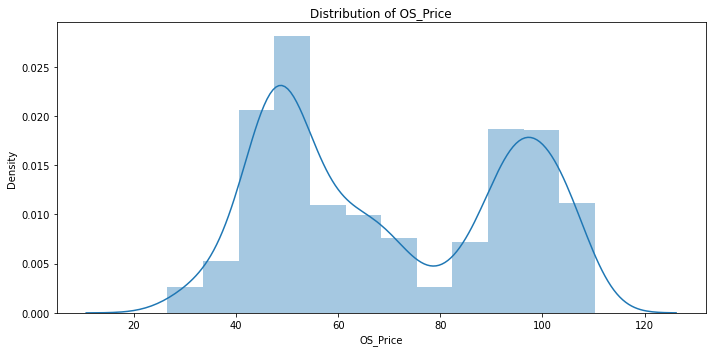

count    1718.000000
mean       70.275396
std        23.480047
min        27.340000
25%        49.030000
50%        64.840000
75%        94.425000
max       110.340000
Name: OS_Open, dtype: float64


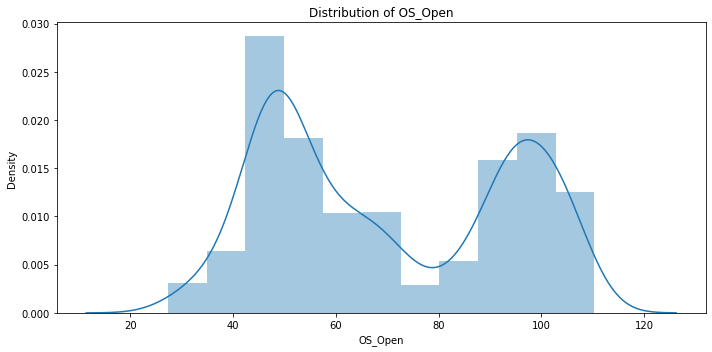

count    1718.000000
mean       71.120256
std        23.494737
min        27.610000
25%        49.692500
50%        65.565000
75%        95.390000
max       112.280000
Name: OS_High, dtype: float64


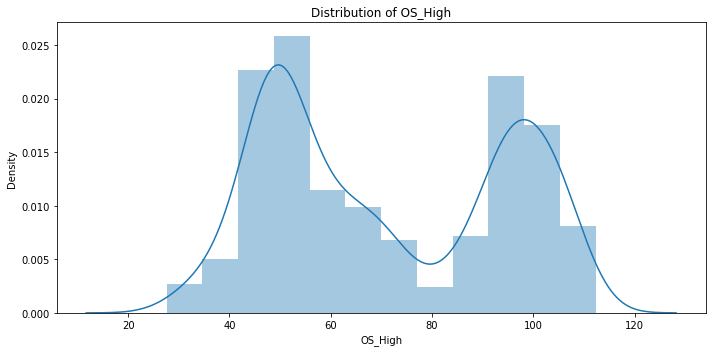

count    1718.000000
mean       69.330990
std        23.422198
min        26.180000
25%        48.200000
50%        63.755000
75%        93.475000
max       109.150000
Name: OS_Low, dtype: float64


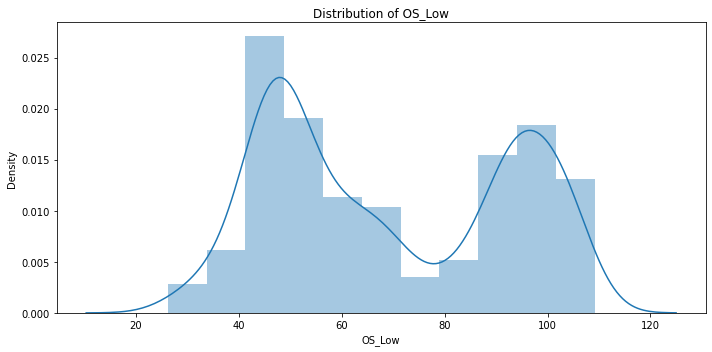

count    1718.000000
mean        0.503492
std         0.500133
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OS_Trend, dtype: float64


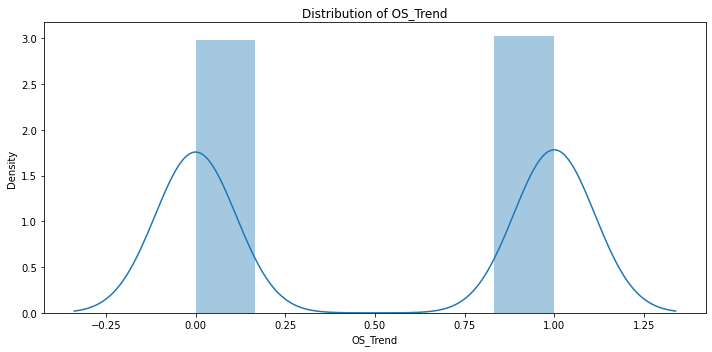

count     1718.000000
mean     43284.478463
std       7530.704012
min      33170.000000
25%      38018.750000
50%      40521.500000
75%      46580.500000
max      65292.000000
Name: SF_Price, dtype: float64


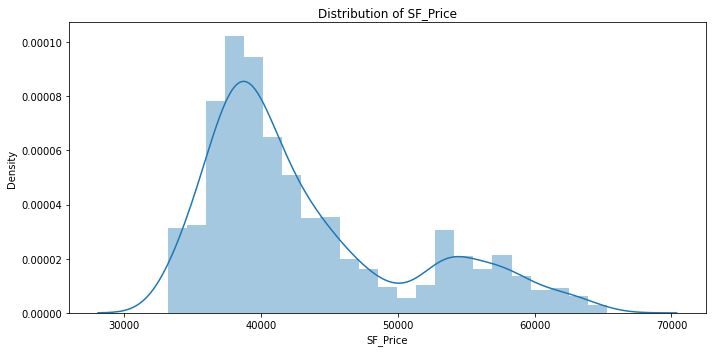

count     1718.000000
mean     43308.692084
std       7550.423242
min      33146.000000
25%      38028.750000
50%      40528.000000
75%      46661.250000
max      65400.000000
Name: SF_Open, dtype: float64


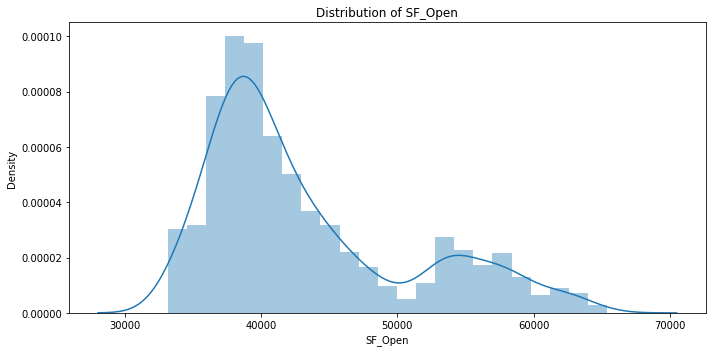

count     1718.000000
mean     43671.194412
std       7614.302267
min      33566.000000
25%      38293.500000
50%      40841.000000
75%      47071.000000
max      65723.000000
Name: SF_High, dtype: float64


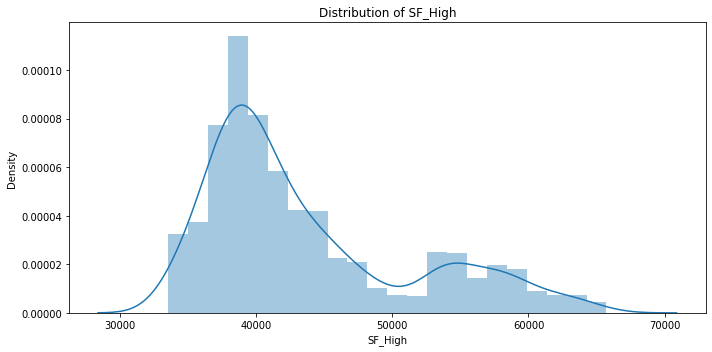

count     1718.000000
mean     42911.912107
std       7443.076538
min      32626.000000
25%      37690.250000
50%      40239.000000
75%      46133.250000
max      64132.000000
Name: SF_Low, dtype: float64


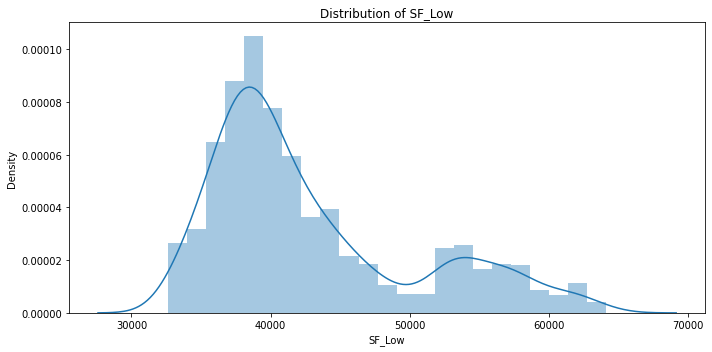

count      1718.000000
mean      26912.462165
std       21880.969122
min          40.000000
25%       14210.000000
50%       19645.000000
75%       29915.000000
max      203730.000000
Name: SF_Volume, dtype: float64


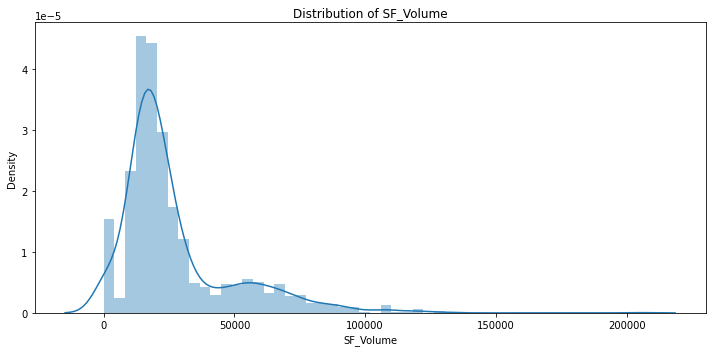

count    1718.000000
mean        0.480792
std         0.499776
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SF_Trend, dtype: float64


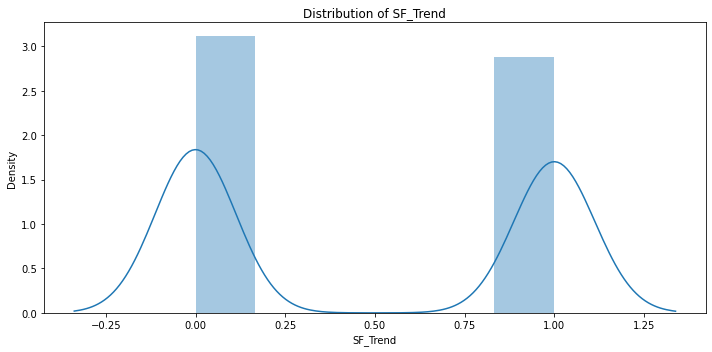

count    1718.000000
mean        2.262769
std         0.433469
min         1.358000
25%         1.905250
50%         2.259000
75%         2.597000
max         3.239000
Name: USB_Price, dtype: float64


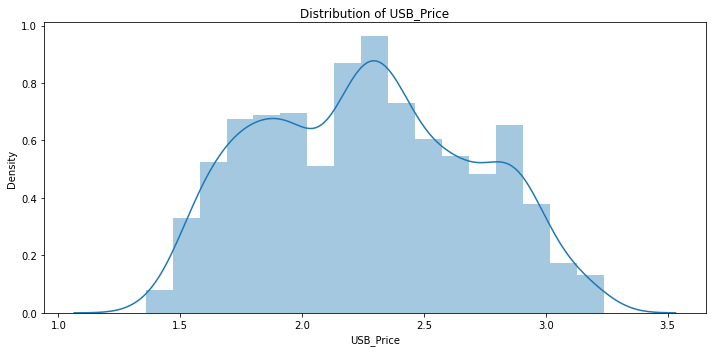

count    1718.000000
mean        2.263091
std         0.433977
min         1.366000
25%         1.905000
50%         2.259000
75%         2.597750
max         3.237000
Name: USB_Open, dtype: float64


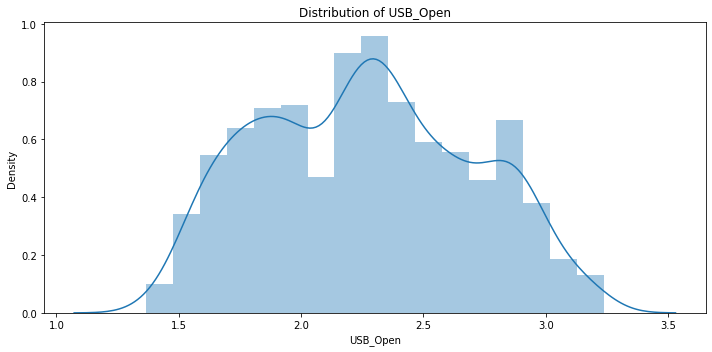

count    1718.000000
mean        2.286512
std         0.437574
min         1.391000
25%         1.920250
50%         2.290000
75%         2.620000
max         3.261000
Name: USB_High, dtype: float64


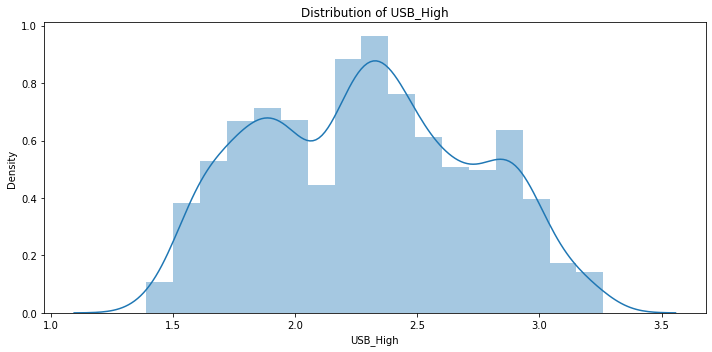

count    1718.000000
mean        2.238765
std         0.429960
min         1.321000
25%         1.886250
50%         2.230000
75%         2.575000
max         3.231000
Name: USB_Low, dtype: float64


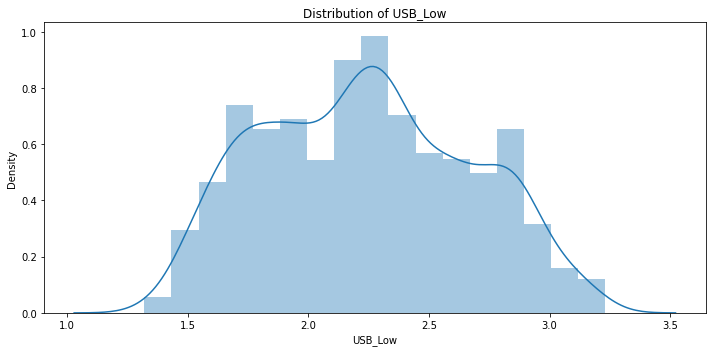

count    1718.000000
mean        0.490105
std         0.500048
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: USB_Trend, dtype: float64


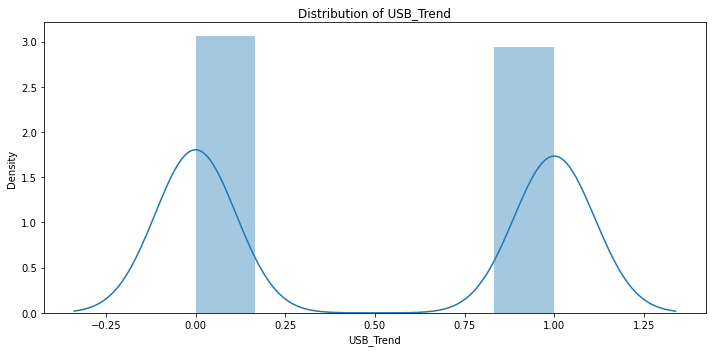

count    1718.000000
mean     1183.915425
std       273.842095
min       775.600000
25%       944.075000
50%      1098.025000
75%      1442.862500
max      1737.600000
Name: PLT_Price, dtype: float64


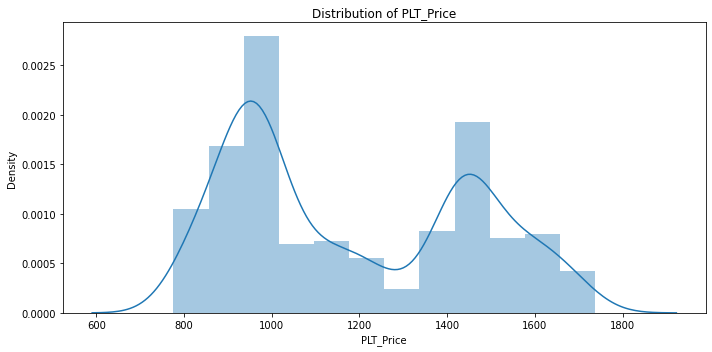

count    1718.000000
mean     1184.388853
std       273.978168
min       765.300000
25%       944.025000
50%      1098.175000
75%      1442.812500
max      1737.800000
Name: PLT_Open, dtype: float64


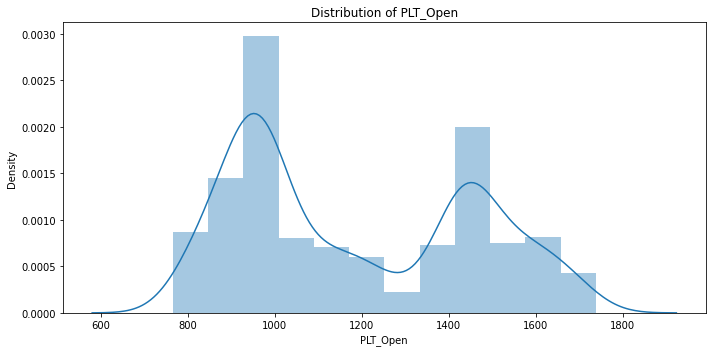

count    1718.000000
mean     1194.274622
std       275.427791
min       786.500000
25%       952.650000
50%      1107.525000
75%      1454.287500
max      1742.900000
Name: PLT_High, dtype: float64


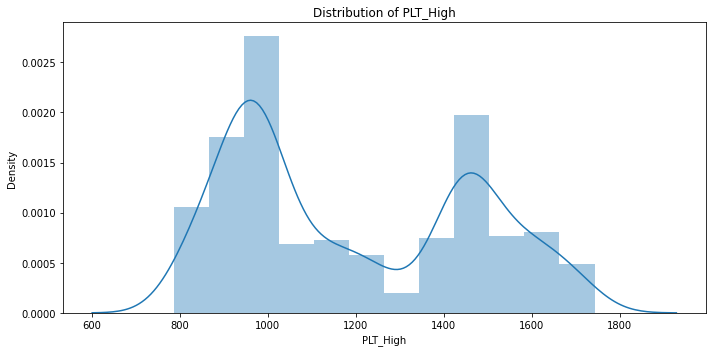

count    1718.000000
mean     1173.409692
std       271.799909
min       756.000000
25%       935.850000
50%      1086.550000
75%      1432.087500
max      1717.150000
Name: PLT_Low, dtype: float64


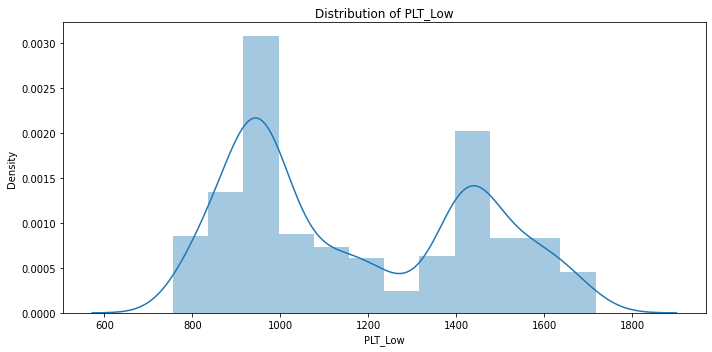

count    1718.000000
mean        0.484284
std         0.499898
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: PLT_Trend, dtype: float64


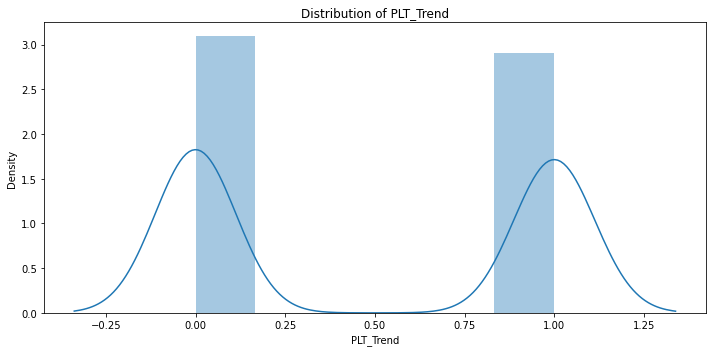

count    1718.000000
mean      766.805122
std       148.307189
min       470.450000
25%       663.212500
50%       748.300000
75%       848.200000
max      1197.500000
Name: PLD_Price, dtype: float64


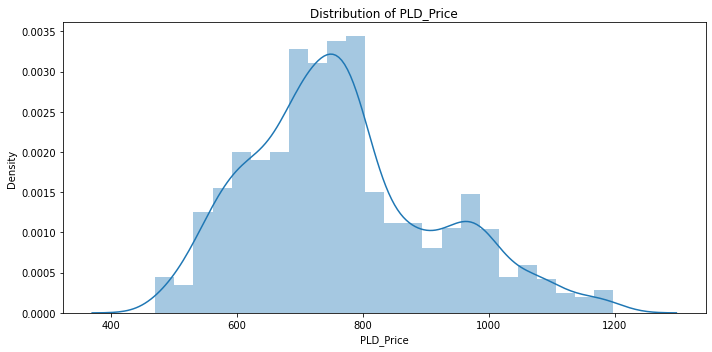

count    1718.000000
mean      766.363481
std       148.078365
min       458.600000
25%       663.287500
50%       748.000000
75%       846.700000
max      1196.000000
Name: PLD_Open, dtype: float64


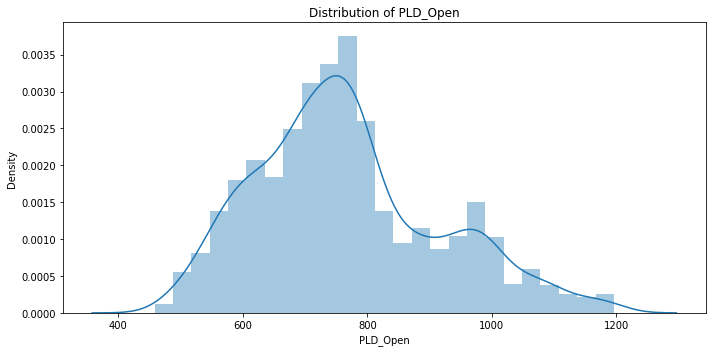

count    1718.000000
mean      773.529302
std       149.010291
min       473.150000
25%       670.162500
50%       753.800000
75%       855.600000
max      1208.700000
Name: PLD_High, dtype: float64


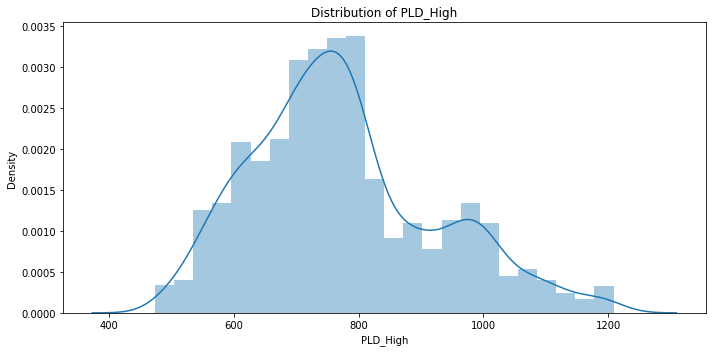

count    1718.000000
mean      759.444208
std       147.381087
min       458.600000
25%       657.025000
50%       742.450000
75%       840.112500
max      1183.600000
Name: PLD_Low, dtype: float64


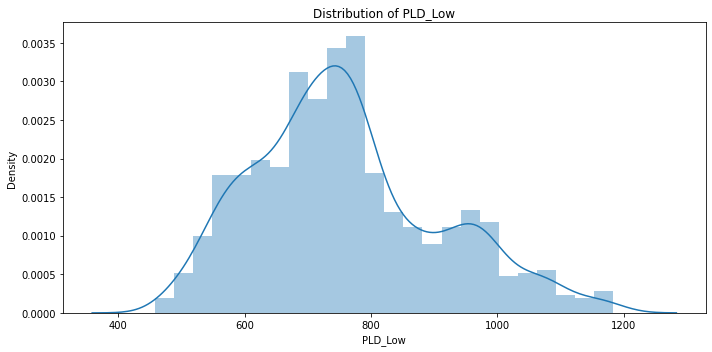

count    1718.000000
mean        0.530850
std         0.499193
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PLD_Trend, dtype: float64


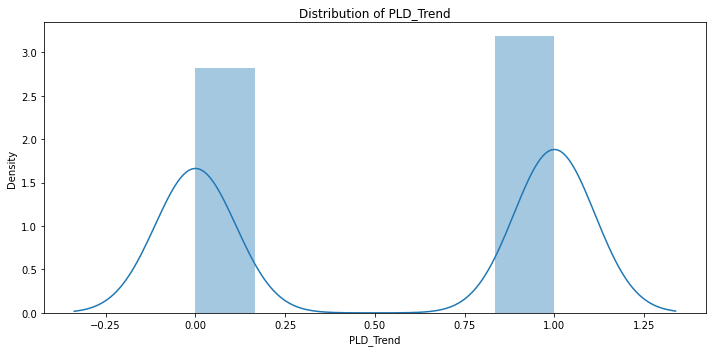

count    1718.000000
mean     1130.442375
std       570.012881
min         0.000000
25%       785.000000
50%      1100.000000
75%      1307.500000
max      2600.000000
Name: RHO_PRICE, dtype: float64


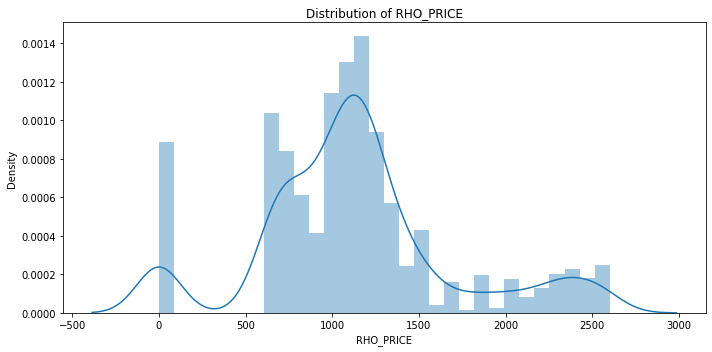

count    1718.000000
mean       89.809427
std         7.516115
min        78.300000
25%        81.380250
50%        92.883500
75%        96.103750
max       103.288000
Name: USDI_Price, dtype: float64


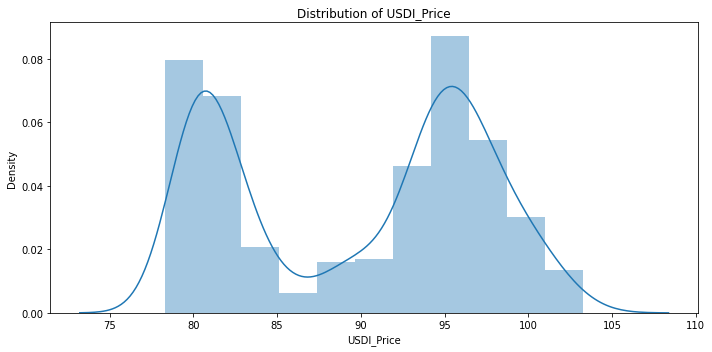

count    1718.000000
mean       89.805442
std         7.520788
min        78.220000
25%        81.380000
50%        92.905000
75%        96.115000
max       103.350000
Name: USDI_Open, dtype: float64


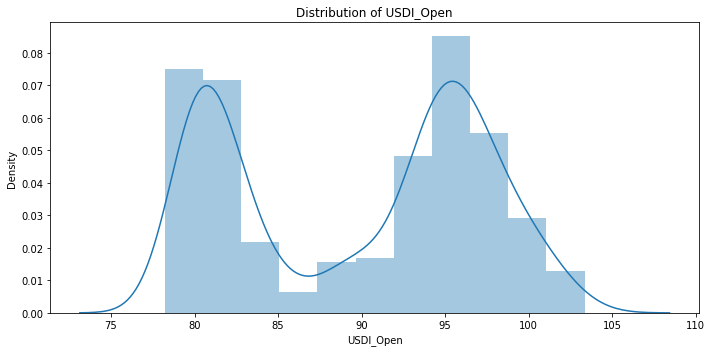

count    1718.000000
mean       90.098981
std         7.567895
min        78.640000
25%        81.617500
50%        93.155000
75%        96.472500
max       103.815000
Name: USDI_High, dtype: float64


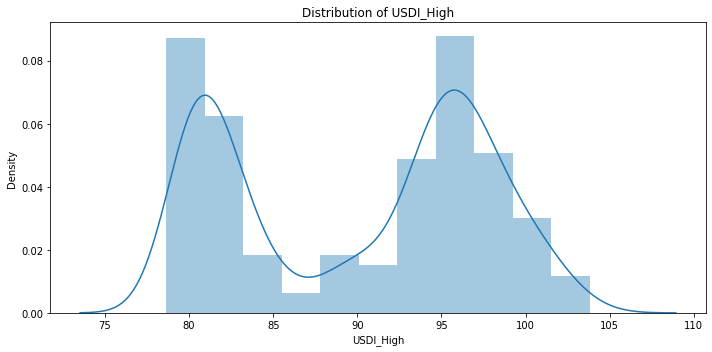

count    1718.000000
mean       89.509331
std         7.459269
min        78.120000
25%        81.111250
50%        92.572500
75%        95.730000
max       102.975000
Name: USDI_Low, dtype: float64


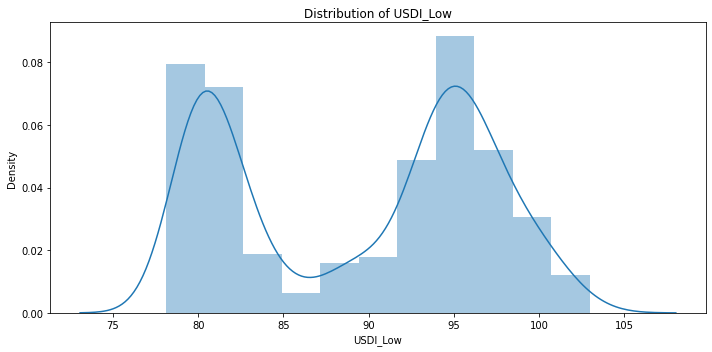

count      1718.000000
mean      27568.300349
std       14643.314699
min          60.000000
25%       18137.500000
50%       24445.000000
75%       33745.000000
max      142820.000000
Name: USDI_Volume, dtype: float64


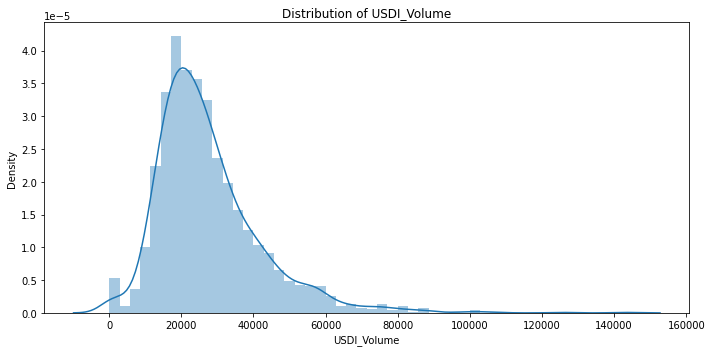

count    1718.000000
mean        0.512806
std         0.499982
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: USDI_Trend, dtype: float64


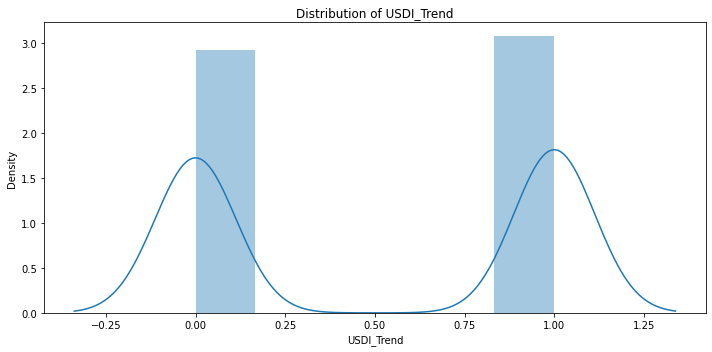

count    1718.000000
mean       26.747427
std        10.620552
min        12.700000
25%        20.642499
50%        23.115001
75%        27.430001
max        57.520000
Name: GDX_Open, dtype: float64


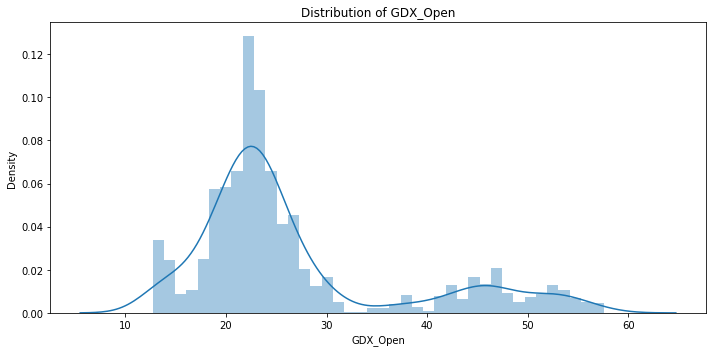

count    1718.000000
mean       27.071304
std        10.706388
min        12.920000
25%        20.952500
50%        23.370001
75%        27.770000
max        57.939999
Name: GDX_High, dtype: float64


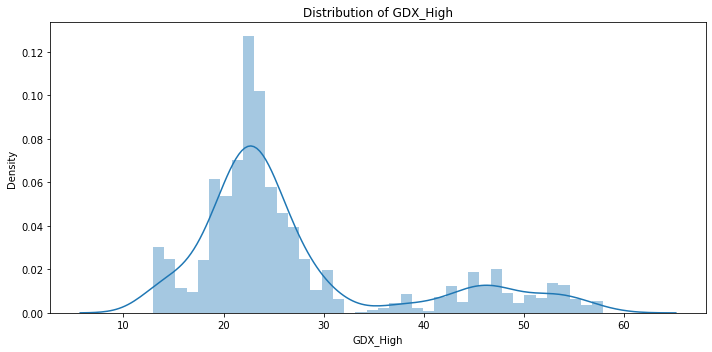

count    1718.000000
mean       26.384575
std        10.490908
min        12.400000
25%        20.355000
50%        22.870001
75%        26.797500
max        56.770000
Name: GDX_Low, dtype: float64


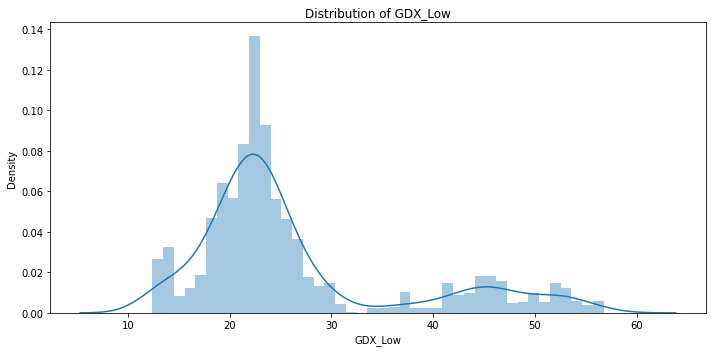

count    1718.000000
mean       26.715012
std        10.603110
min        12.470000
25%        20.585000
50%        23.054999
75%        27.317500
max        57.470001
Name: GDX_Close, dtype: float64


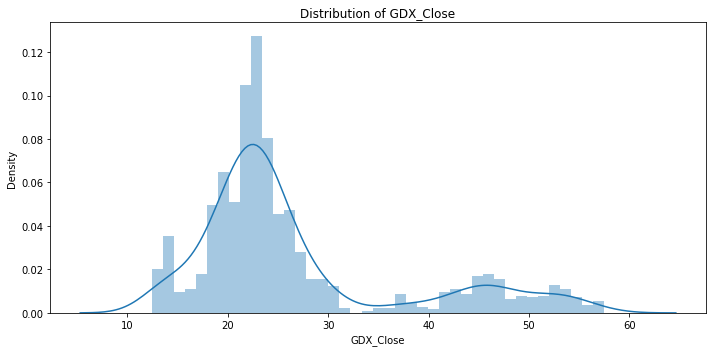

count    1718.000000
mean       25.924624
std         9.886570
min        12.269618
25%        20.180950
50%        22.677604
75%        26.478154
max        54.617039
Name: GDX_Adj Close, dtype: float64


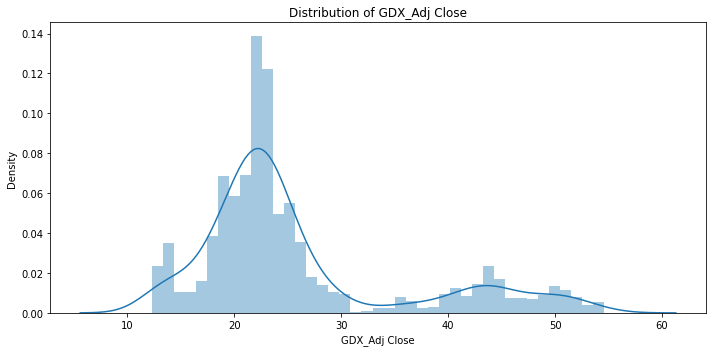

count    1.718000e+03
mean     4.356515e+07
std      2.909151e+07
min      4.729000e+06
25%      2.259968e+07
50%      3.730465e+07
75%      5.697055e+07
max      2.321536e+08
Name: GDX_Volume, dtype: float64


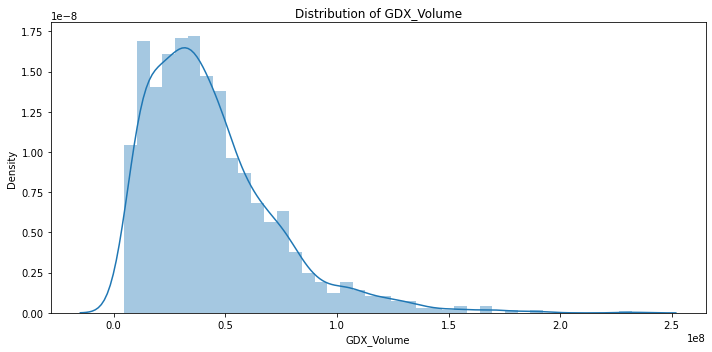

count    1718.000000
mean       22.113417
std        11.431056
min         7.820000
25%        11.420000
50%        16.450000
75%        34.419998
max        41.599998
Name: USO_Open, dtype: float64


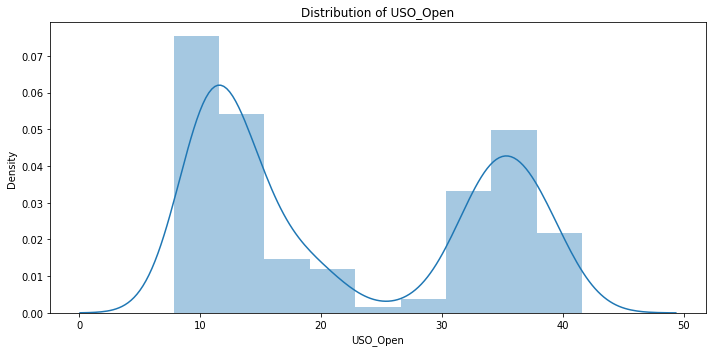

count    1718.000000
mean       22.307148
std        11.478671
min         8.030000
25%        11.500000
50%        16.635001
75%        34.667499
max        42.299999
Name: USO_High, dtype: float64


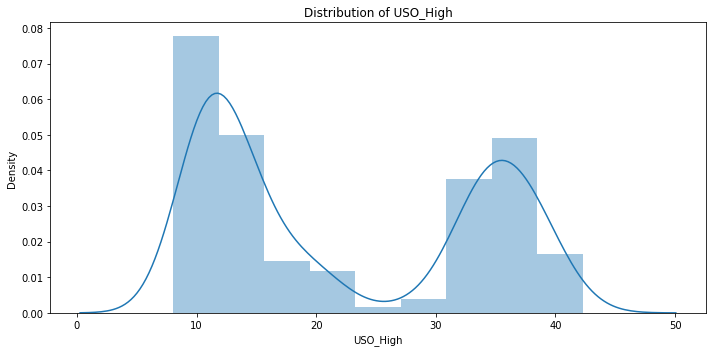

count    1718.000000
mean       21.904657
std        11.373997
min         7.670000
25%        11.300000
50%        16.040000
75%        34.110000
max        41.299999
Name: USO_Low, dtype: float64


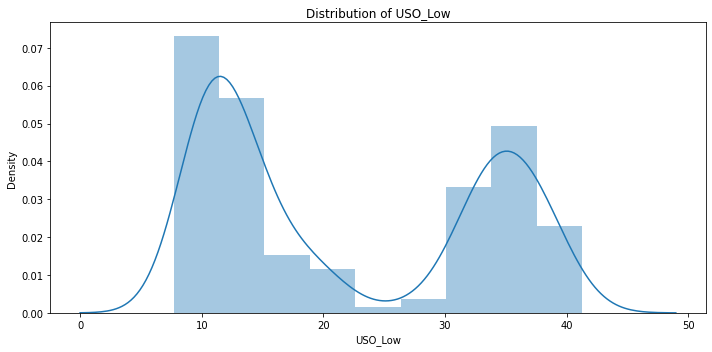

count    1718.000000
mean       22.109051
std        11.432787
min         7.960000
25%        11.392500
50%        16.345000
75%        34.417499
max        42.009998
Name: USO_Close, dtype: float64


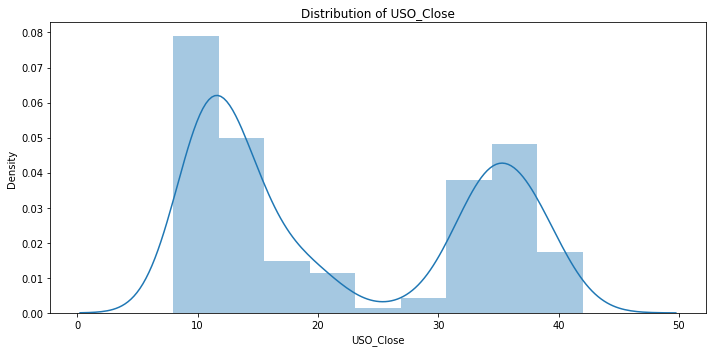

count    1718.000000
mean       22.109051
std        11.432787
min         7.960000
25%        11.392500
50%        16.345000
75%        34.417499
max        42.009998
Name: USO_Adj Close, dtype: float64


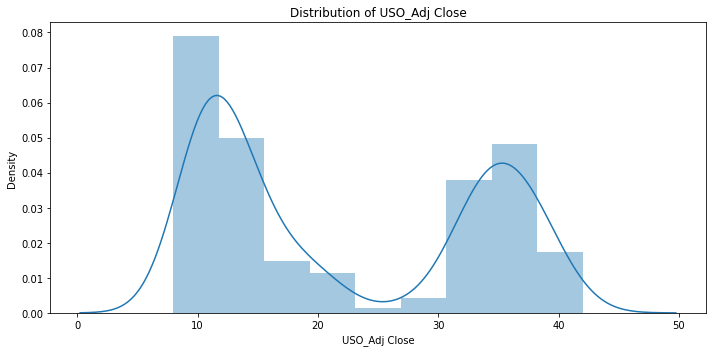

count    1.718000e+03
mean     1.922313e+07
std      1.575743e+07
min      1.035100e+06
25%      6.229500e+06
50%      1.613015e+07
75%      2.672375e+07
max      1.102657e+08
Name: USO_Volume, dtype: float64


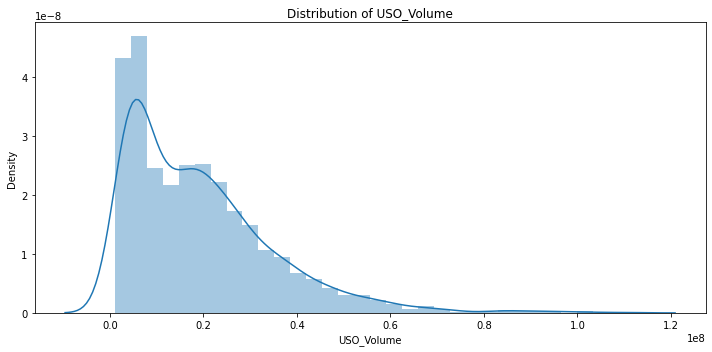

In [31]:
numeric_distribution_plot(df)

### Plotting the correlation

In [11]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Open,1.000000,0.999515,0.999442,0.998976,0.998976,0.251921,-0.684314,-0.684597,-0.683464,-0.683998,-0.665788,0.242265,-0.588615,-0.588534,-0.587941,-0.588179,-0.588179,-0.155915,0.863226,0.861273,0.863740,0.862066,0.859143,-0.127269,0.580586,0.579304,0.582948,0.577043,0.010250,0.710348,0.708938,0.711079,0.708038,-0.225405,0.045286,0.630270,0.629795,0.631616,0.628710,0.056485,0.946923,0.946454,0.945632,0.948152,0.708413,0.017132,-0.441423,-0.441780,-0.464759,-0.417975,-0.018419,0.775265,0.774171,0.775528,0.774047,-0.002555,-0.213162,-0.215840,-0.217142,-0.214507,0.018274,0.096399,-0.721133,-0.720350,-0.720013,-0.721968,-0.207064,-0.007063,0.975510,0.975143,0.975479,0.974596,0.974098,-0.514230,0.634872,0.634864,0.634277,0.635138,0.635138,-0.455920
High,0.999515,1.000000,0.999262,0.999535,0.999535,0.261064,-0.688118,-0.688365,-0.687325,-0.687817,-0.669657,0.247883,-0.592459,-0.592376,-0.591864,-0.592072,-0.592072,-0.157978,0.864864,0.863336,0.865556,0.864276,0.861358,-0.124106,0.581787,0.580143,0.584050,0.577891,0.015209,0.711245,0.709720,0.711967,0.708806,-0.225274,0.046764,0.631470,0.630847,0.632808,0.629749,0.058236,0.947434,0.946187,0.945888,0.947901,0.712873,0.023581,-0.443377,-0.443266,-0.466330,-0.419765,-0.021915,0.777601,0.775989,0.777677,0.775923,0.004889,-0.216981,-0.219974,-0.221115,-0.218568,0.022405,0.093272,-0.722573,-0.721454,-0.721134,-0.723371,-0.201262,-0.011713,0.975429,0.975722,0.975650,0.975341,0.974746,-0.508782,0.637101,0.637208,0.636538,0.637483,0.637483,-0.454913
Low,0.999442,0.999262,1.000000,0.999532,0.999532,0.237031,-0.680911,-0.681242,-0.679988,-0.680567,-0.662325,0.235838,-0.585021,-0.585009,-0.584304,-0.584592,-0.584592,-0.153442,0.861282,0.859493,0.862220,0.860614,0.857697,-0.129967,0.580633,0.578906,0.582613,0.576936,0.016249,0.710616,0.709057,0.711224,0.708290,-0.225901,0.047973,0.630436,0.629721,0.631587,0.628832,0.058875,0.947373,0.946032,0.945280,0.948437,0.701648,0.023881,-0.438559,-0.438496,-0.461766,-0.414710,-0.022045,0.774112,0.772421,0.773877,0.772672,0.005959,-0.208824,-0.211947,-0.213075,-0.210420,0.024138,0.098648,-0.720684,-0.719513,-0.719438,-0.721184,-0.212337,-0.013227,0.974725,0.974587,0.975337,0.974568,0.974182,-0.519988,0.633591,0.633623,0.633140,0.633994,0.633994,-0.457628
Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,-0.666071,0.241949,-0.588800,-0.588778,-0.588157,-0.588411,-0.588411,-0.155526,0.862900,0.861479,0.863917,0.862770,0.859850,-0.126586,0.581036,0.579036,0.582969,0.577000,0.019913,0.710693,0.709096,0.711334,0.708266,-0.225436,0.048205,0.630817,0.630046,0.632001,0.629083,0.059510,0.947420,0.945557,0.945203,0.947842,0.706505,0.028100,-0.441347,-0.440822,-0.464116,-0.417352,-0.025933,0.775861,0.773760,0.775481,0.773993,0.011355,-0.213179,-0.216426,-0.217490,-0.214919,0.026536,0.095782,-0.721569,-0.720140,-0.720023,-0.722078,-0.205954,-0.016641,0.974824,0.975255,0.975561,0.975459,0.974980,-0.514616,0.635197,0.635311,0.634732,0.635675,0.635675,-0.456193
Adj Close,0.998976,0.999535,0.999532,1.000000,1.000000,0.246778,-0.684618,-0.684904,-0.683750,-0.684284,-0.666071,0.241949,-0.588800,-0.588778,-0.588157,-0.588411,-0.588411,-0.155526,0.862900,0.861479,0.863917,0.862770,0.859850,-0.126586,0.581036,0.579036,0.582969,

In [12]:
#As our target variable will be adj_close so we've to sort its value before processing
#abs() being used for removing any ambiguity from values
cor=df.corr().abs()['Adj Close'].sort_values(ascending=False)
corr_d=cor[cor < 0.50]
corr_d

USB_High       0.464116
USO_Volume     0.456193
USB_Price      0.441347
USB_Open       0.440822
USB_Low        0.417352
Volume         0.246778
SP_volume      0.241949
OF_Volume      0.225436
PLD_High       0.217490
PLD_Open       0.216426
PLD_Low        0.214919
PLD_Price      0.213179
USDI_Volume    0.205954
DJ_volume      0.155526
EG_volume      0.126586
RHO_PRICE      0.095782
OS_Trend       0.059510
OF_Trend       0.048205
SF_Trend       0.028100
PLD_Trend      0.026536
USB_Trend      0.025933
EU_Trend       0.019913
USDI_Trend     0.016641
PLT_Trend      0.011355
Name: Adj Close, dtype: float64

In [13]:
to_drop=list(corr_d.index)
df1=df.drop(to_drop,axis=1)
df1.head()

,Open,High,Low,Close,Adj Close,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EU_Price,EU_open,EU_high,EU_low,OF_Price,OF_Open,OF_High,OF_Low,OS_Price,OS_Open,OS_High,OS_Low,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,PLT_Price,PLT_Open,PLT_High,PLT_Low,USDI_Price,USDI_Open,USDI_High,USDI_Low,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,123.029999,123.199997,121.989998,122.180000,105.441238,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,74.550003,76.150002,72.150002,72.900002,70.431755,1.3018,1.2982,1.3051,1.2957,105.09,104.88,106.50,104.88,93.42,94.91,96.00,93.33,53604,54248,54248,52316,119440,1414.65,1420.30,1423.35,1376.85,80.341,80.565,80.630,80.130,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,122.230003,122.949997,121.300003,121.589996,105.597549,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,73.599998,75.099998,73.349998,74.900002,72.364037,1.3035,1.3020,1.3087,1.2997,103.35,103.51,104.56,102.46,93.79,93.43,94.80,92.53,53458,53650,54030,52890,65390,1420.25,1414.75,1431.75,1400.70,80.249,80.175,80.395,79.935,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,122.059998,122.320000,120.029999,120.290001,104.468536,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,69.099998,69.800003,64.199997,64.699997,62.509384,1.2995,1.3043,1.3044,1.2981,103.64,103.63,104.57,102.37,94.09,93.77,94.43,92.55,52961,53400,53400,52544,67280,1411.10,1422.65,1427.60,1404.60,80.207,80.300,80.470,80.125,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,122.180000,124.139999,120.370003,123.930000,107.629784,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,66.449997,68.099998,66.000000,67.000000,64.731514,1.3079,1.3003,1.3133,1.2994,106.73,104.30,107.27,103.91,95.55,96.39,99.70,96.39,53487,52795,53575,52595,55130,1434.75,1408.95,1436.55,1408.15,80.273,80.890,80.940,80.035,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,123.930000,124.360001,122.750000,124.169998,107.838242,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,67.099998,69.400002,66.900002,68.500000,66.180725,1.3045,1.3079,1.3197,1.3024,107.71,107.15,108.17,106.16,99.01,97.54,99.26,96.81,53148,53519,54184,52937,75950,1429.05,1434.40,1453.75,1417.65,80.350,80.105,80.445,79.550,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001


### Pearson Correlation Coefficient

In [14]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(df1['Adj Close'], df1['GDX_Adj Close'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9749798540904567  with a P-value of P = 0.0


### Getting the list of columns

In [15]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

### Getting the Uniques values of each columns

In [16]:
df['Open'].nunique()

80

### Plotting the Target Column(Adj Close)

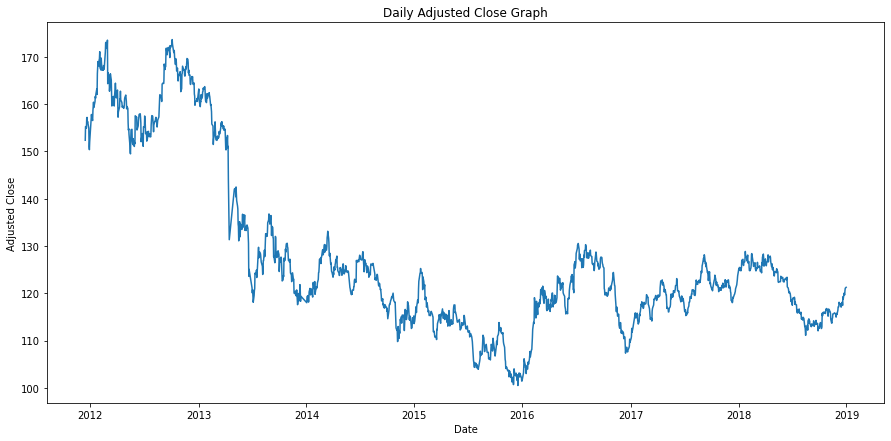

In [16]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date',y='Adj Close',data=df)
plt.xlabel('Date');
plt.ylabel('Adjusted Close');
plt.title('Daily Adjusted Close Graph');

### The dataset has S&P and Dow Jones Index
### Finding relation between S&P and DJ(Dow Jones) and gold index

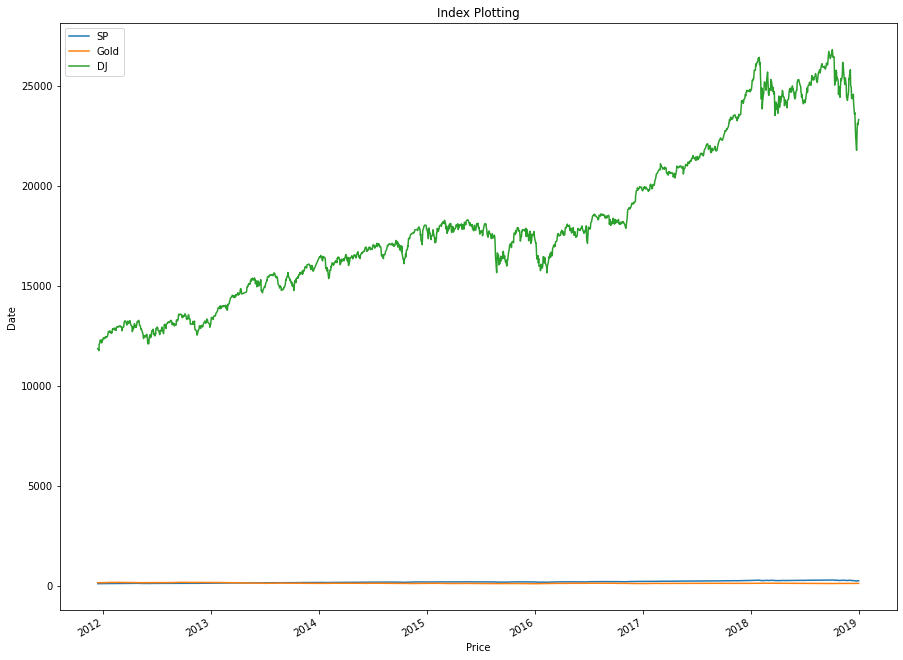

In [17]:

y1=df['SP_Ajclose']

y2=df['Adj Close']
y3=df['DJ_Ajclose']

data = pd.DataFrame({'SP':y1,'Gold':y2,'DJ':y3})
d=data.plot(title='Index Plotting',figsize=(15,12));
d.set_ylabel('Date');
d.set_xlabel('Price');
plt.show();

### Finding correlation between the 3 indexes

In [18]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

### Plotting a heatmap of the 3 indexes to find relation

<AxesSubplot:>

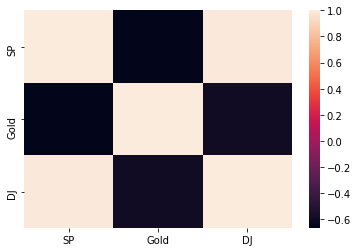

In [19]:
sns.heatmap(corr_array,xticklabels=data.columns,yticklabels=data.columns)

### There seems to be no relation of gold with neither of the indexes.
#### But we still find that DJ and SP are correlated

### Finding the correlation between all the columns

In [20]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

### Plotting a heatmap of all the columns

<AxesSubplot:>

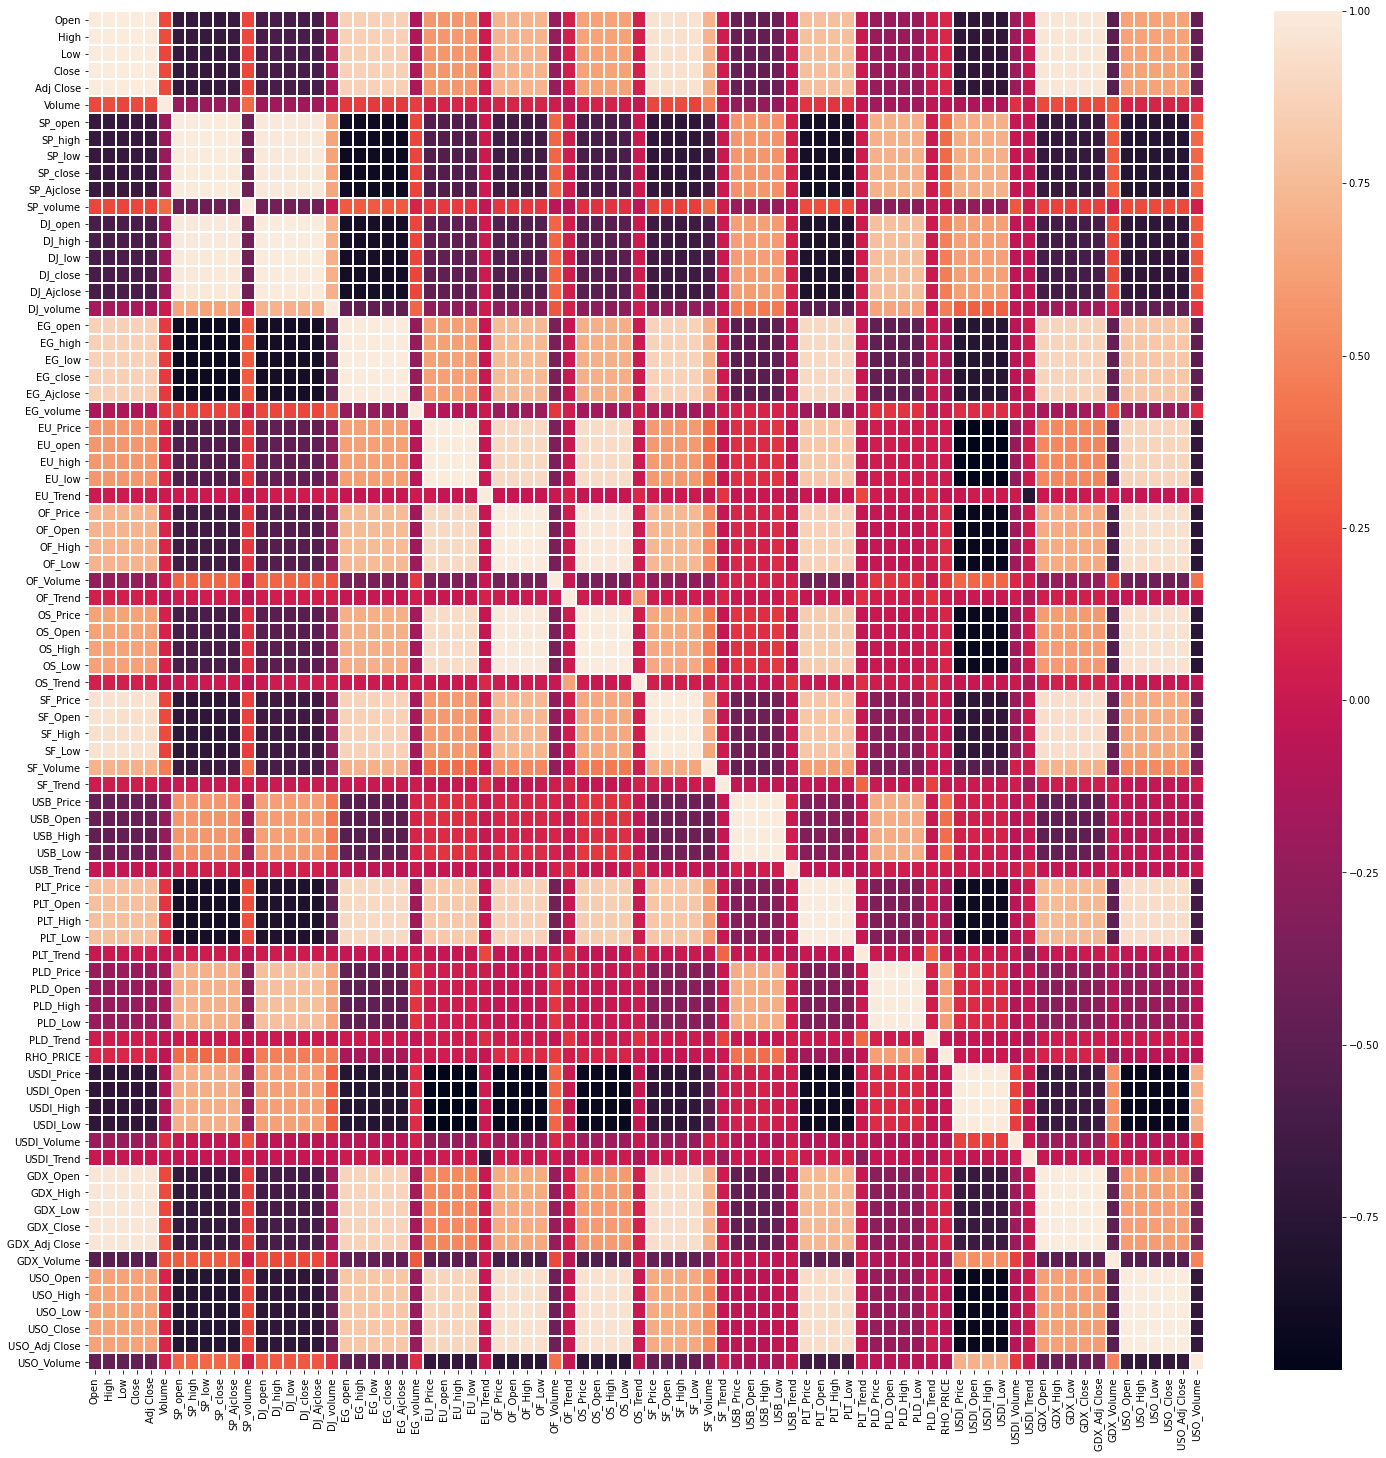

In [21]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_array,xticklabels=df.columns,yticklabels=df.columns,linewidths=2)

### Finding highest and lowest correlated columns

In [22]:
corr_mat =correlation.corr()
coeff = corr_mat['Adj Close'].sort_values(ascending = False)

### Highly Correlated Values

In [23]:
coeff[coeff>0.5]

Close            1.000000
Adj Close        1.000000
Low              0.999991
High             0.999990
Open             0.999989
GDX_Low          0.999108
GDX_Open         0.999032
GDX_Close        0.999015
GDX_High         0.998953
GDX_Adj Close    0.998925
SF_Low           0.998181
SF_Price         0.998048
SF_Open          0.998014
SF_High          0.997875
EG_low           0.985659
EG_open          0.985548
EG_close         0.985478
EG_high          0.985306
EG_Ajclose       0.985131
SF_Volume        0.982159
PLT_High         0.967082
PLT_Price        0.966961
PLT_Open         0.966782
PLT_Low          0.966636
USO_High         0.929826
USO_Close        0.929609
USO_Adj Close    0.929609
USO_Open         0.929570
USO_Low          0.929172
OF_High          0.925818
OF_Price         0.925359
OF_Open          0.924943
OF_Low           0.924433
OS_High          0.903344
OS_Open          0.902324
OS_Price         0.902312
OS_Low           0.901569
EU_high          0.887717
EU_Price    

### Non Correlated Values

In [24]:
coeff[coeff<0]

SF_Trend      -0.049784
EU_Trend      -0.053464
OF_Trend      -0.070489
PLT_Trend     -0.144657
USB_Trend     -0.271175
RHO_PRICE     -0.526440
USDI_Volume   -0.540394
USB_Low       -0.748493
USB_Open      -0.767194
USB_Price     -0.768888
PLD_Low       -0.779308
PLD_Open      -0.780353
PLD_Price     -0.780869
PLD_High      -0.783879
USB_High      -0.785632
EG_volume     -0.790091
DJ_volume     -0.859087
USO_Volume    -0.869464
OF_Volume     -0.880539
GDX_Volume    -0.906263
USDI_High     -0.937661
USDI_Open     -0.937987
USDI_Price    -0.938306
USDI_Low      -0.938784
DJ_low        -0.945309
DJ_Ajclose    -0.945526
DJ_close      -0.945526
DJ_open       -0.945550
DJ_high       -0.945688
SP_Ajclose    -0.958082
SP_low        -0.960242
SP_close      -0.960420
SP_open       -0.960438
SP_high       -0.960571
Name: Adj Close, dtype: float64

In [25]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [26]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

### Function to plot Highly Correlated Columns with respect to Target Column

In [27]:
def scatter(i,ax1):
    ax1.scatter(df.index, df[i], s=10, c='lightblue', marker="s", label=i)
    ax1.scatter(df.index,df['Adj Close'], s=10, c='gold', marker="o", label='Adj Close')
    plt.legend(loc='upper left');
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('{} vs Adj Close graph'.format(i))

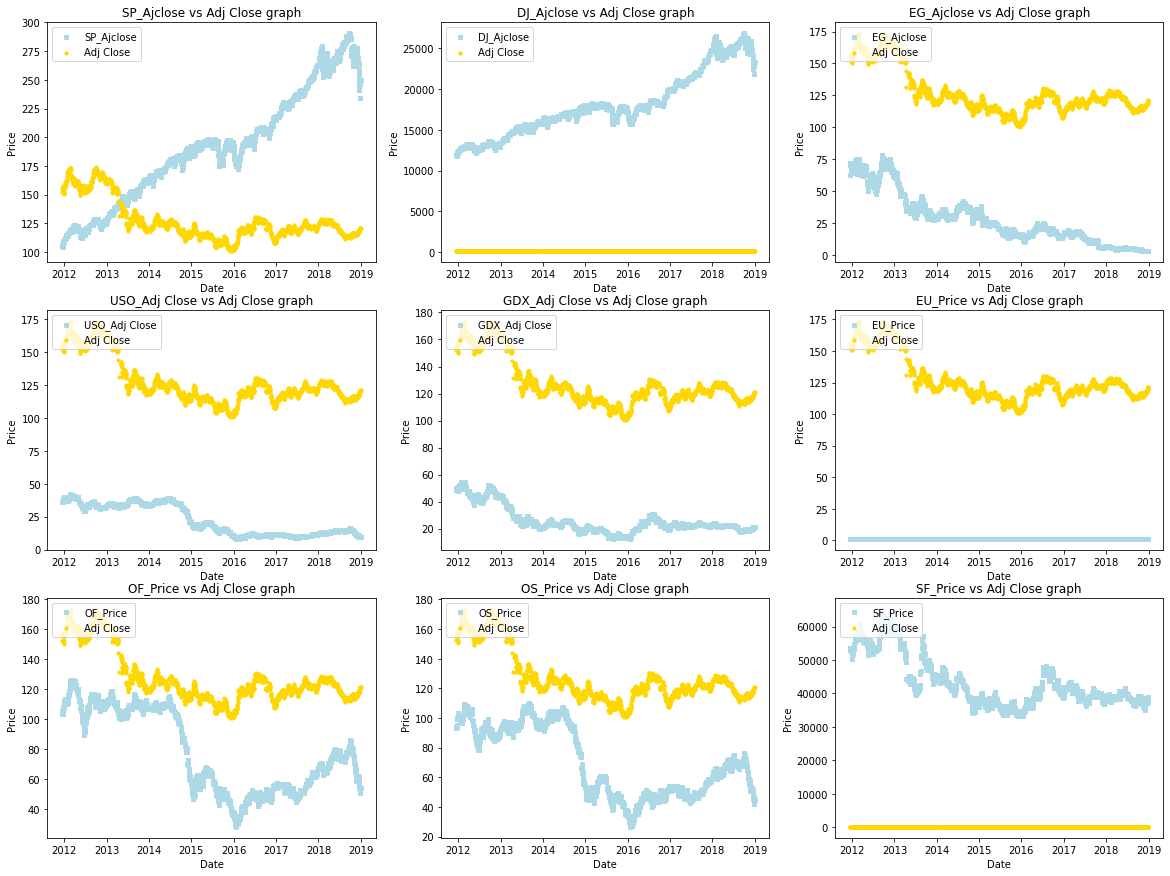

In [28]:
fig=plt.figure(figsize=(20,15))
plt.tight_layout(pad=3.0)
ax1 = fig.add_subplot(331)
scatter('SP_Ajclose',ax1)
ax1 = fig.add_subplot(332)
scatter('DJ_Ajclose',ax1)
ax1 = fig.add_subplot(333)
scatter('EG_Ajclose',ax1)
ax1 = fig.add_subplot(334)
scatter('USO_Adj Close',ax1)
ax1 = fig.add_subplot(335)
scatter('GDX_Adj Close',ax1)
ax1 = fig.add_subplot(336)
scatter('EU_Price',ax1)
ax1 = fig.add_subplot(337)
scatter('OF_Price',ax1)
ax1 = fig.add_subplot(338)
scatter('OS_Price',ax1)
ax1 = fig.add_subplot(339)
scatter('SF_Price',ax1)


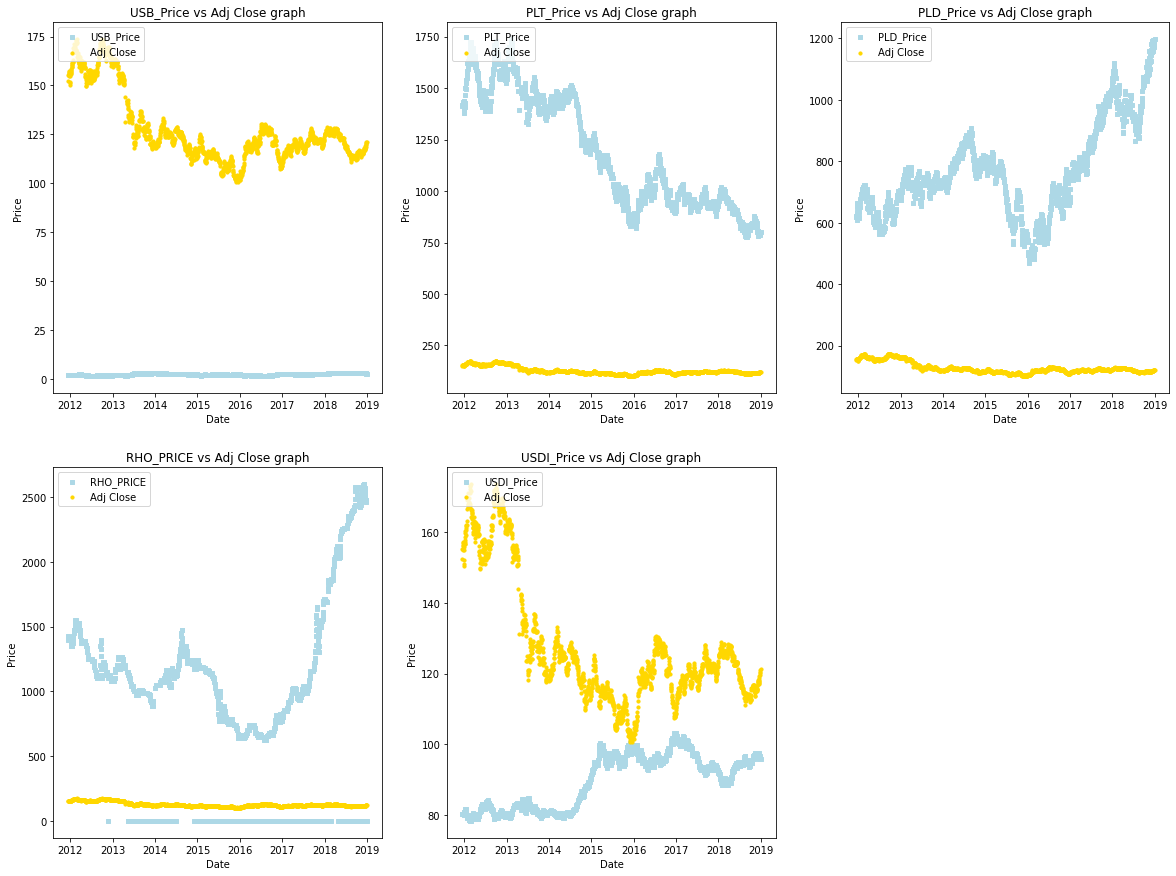

In [29]:
fig=plt.figure(figsize=(20,15))
plt.tight_layout(pad=3.0)
ax1 = fig.add_subplot(231)
scatter('USB_Price',ax1)
ax1 = fig.add_subplot(232)
scatter('PLT_Price',ax1)
ax1 = fig.add_subplot(233)
scatter('PLD_Price',ax1)
ax1 = fig.add_subplot(234)
scatter('RHO_PRICE',ax1)
ax1 = fig.add_subplot(235)
scatter('USDI_Price',ax1)